## Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.loadtxt("E:\CP_Kronos1_Logs_depth.las", skiprows=41)

logs = ['DEPT', 'ADJS1', 'ADJS2', 'CALI', 'DTCO_adj', 'DTCO_inp', 'DTSM', 'GR', 'NPHI', 'RHOB', 'RESD']
data = pd.DataFrame(data, columns=logs)
data [data==-999.2500]= np.nan
data

,DEPT,ADJS1,ADJS2,CALI,DTCO_adj,DTCO_inp,DTSM,GR,NPHI,RHOB,RESD
0,0.0000,0.0000,0.0,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1524,0.0001,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3048,0.0002,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4572,0.0003,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6096,0.0004,NaN,NaN,201.1881,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34713,5290.2612,NaN,NaN,5.80379,NaN,NaN,NaN,NaN,NaN,NaN,11.11034
34714,5290.4136,NaN,NaN,5.75505,NaN,NaN,NaN,NaN,NaN,NaN,12.82979
34715,5290.5660,NaN,NaN,5.70138,NaN,NaN,NaN,NaN,NaN,NaN,13.55044
34716,5290.7184,NaN,NaN,5.68294,NaN,NaN,NaN,NaN,NaN,NaN,13.76641


## Plot All Log Data

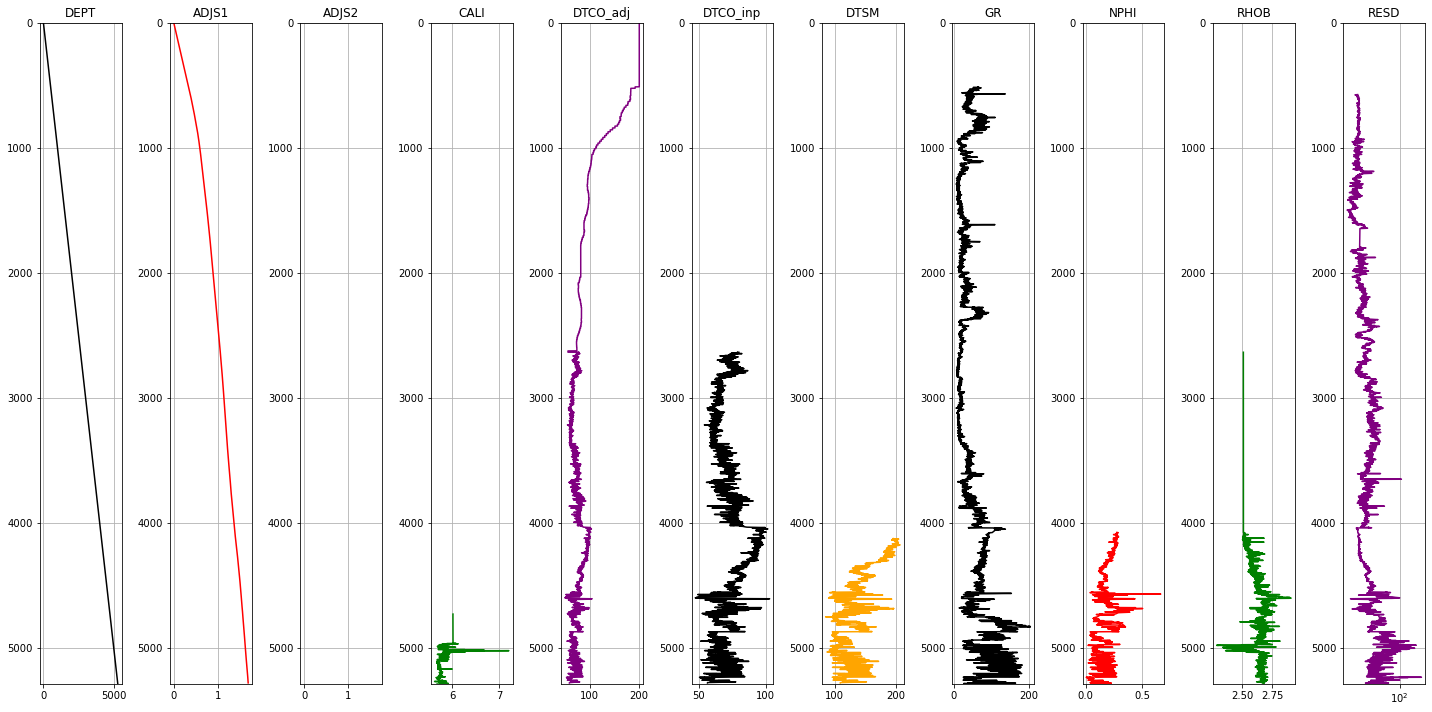

In [3]:
logs = ['DEPT', 'ADJS1', 'ADJS2', 'CALI', 'DTCO_adj', 'DTCO_inp', 'DTSM', 'GR', 'NPHI', 'RHOB', 'RESD']
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange', 'black', 'red', 'green', 'purple']

for i in range(len(logs)):
    if i == 10:
        ax[i].semilogx(data[logs[i]], data['DEPT'], color=colors[i])
    else:
    # for non-resistivity, normal plot
        ax[i].plot(data[logs[i]], data['DEPT'], color=colors[i])
    
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].set_ylim(max(data['DEPT']), 0)
plt.tight_layout(1.1)
plt.show()

## Remove NaN and Plot Log Data 

In [4]:
data = data[['DEPT', 'CALI', 'DTCO_adj', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']]
data = data.dropna()
data

,DEPT,CALI,DTCO_adj,GR,NPHI,RHOB,RESD,DTSM
31045,4731.2580,6.01999,79.96725,38.80238,0.25050,2.66556,2.43580,139.85977
31046,4731.4104,6.01880,80.34195,35.92152,0.24645,2.66857,2.49118,139.35838
31047,4731.5628,6.01880,80.00909,32.95725,0.24084,2.67534,2.74363,139.14355
31048,4731.7152,6.01880,79.30257,30.02623,0.23403,2.68653,3.22170,138.78993
31049,4731.8676,6.01880,78.37672,27.78731,0.22752,2.70163,3.86510,137.37775
...,...,...,...,...,...,...,...,...
34654,5281.2696,5.75321,57.95837,56.51004,0.06369,2.68242,11.67827,109.07732
34655,5281.4220,5.76422,57.95403,53.95823,0.05863,2.68117,16.36135,109.06725
34656,5281.5744,5.77458,57.94971,49.62489,0.05248,2.68051,22.39172,109.05711
34657,5281.7268,5.79369,57.94537,44.21585,0.04640,2.68005,27.36535,109.04709


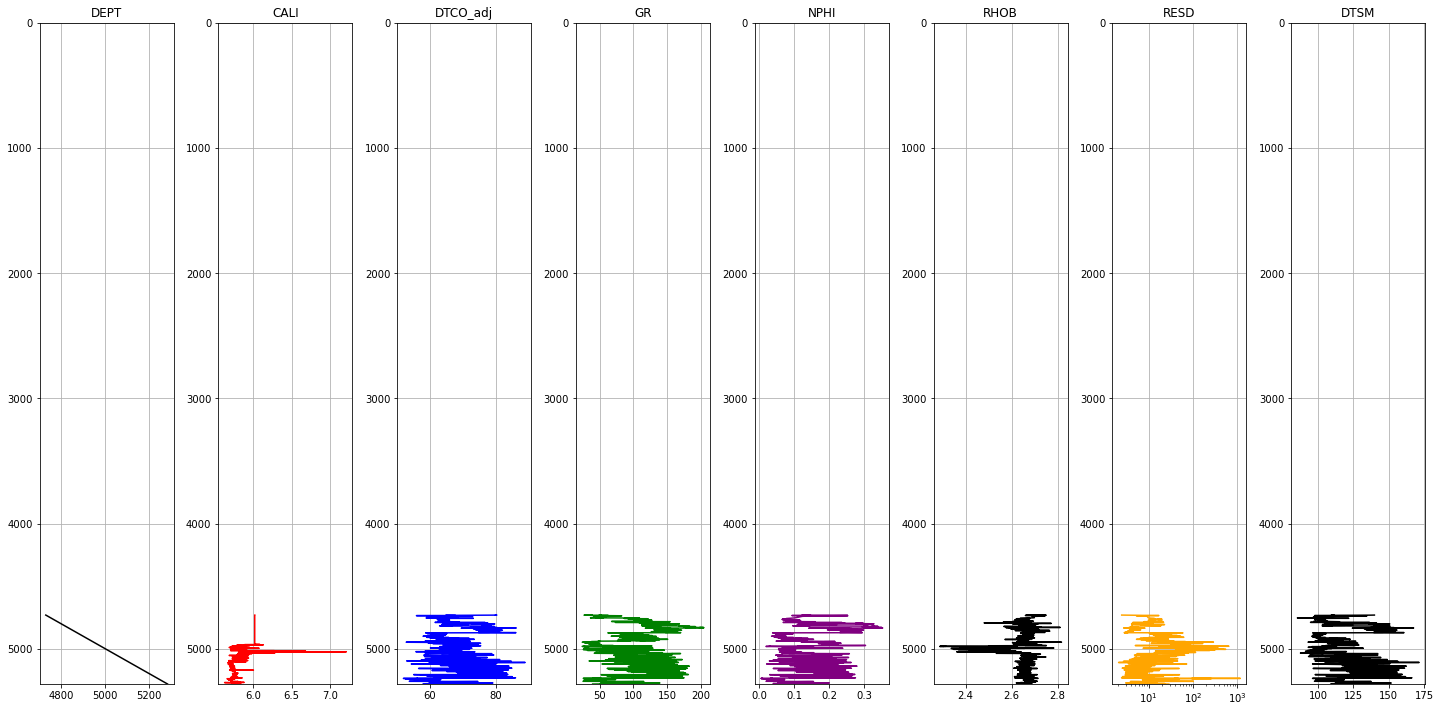

In [5]:
logs = ['DEPT', 'CALI', 'DTCO_adj', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange', 'black', 'red']

for i in range(len(logs)):
    if i == 6:
        ax[i].semilogx(data[logs[i]], data['DEPT'], color=colors[i])
    else:
    # for non-resistivity, normal plot
        ax[i].plot(data[logs[i]], data['DEPT'], color=colors[i])
    
    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].set_ylim(max(data['DEPT']), 0)
plt.tight_layout(1.1)
plt.show()

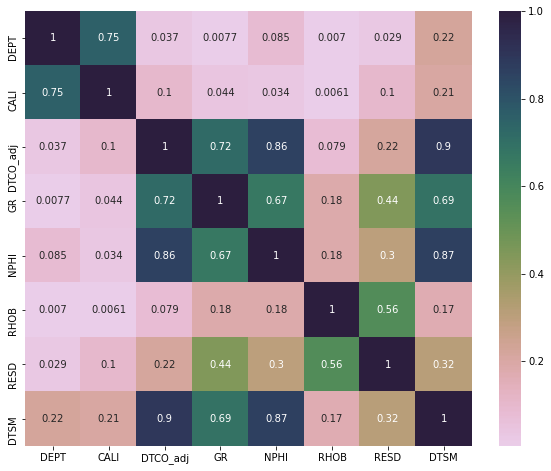

In [6]:
plt.figure(figsize=(10,8))

cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)
sns.heatmap(abs(data.corr()), cmap=cmap, annot=True)

## Make The Model 

In [7]:
#inisiasi data target dan predictor
X = data[['DTCO_adj','NPHI','GR','RESD','DEPT']]
y = data[['DTSM']]
print(X.shape)
print(y.shape)

(3614, 5)
(3614, 1)


In [8]:
# Split Data Sumur Kronos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', early_stopping=True)
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(10,))

In [11]:
from sklearn.model_selection import GridSearchCV

hidden_layer_sizes=[(250, 150,), (250,100,), (250, 150, 100,), (150, 150, 100,)]
activation=['relu', 'logistic']
batch_size = [10, 15, 50]

clf = GridSearchCV(MLPRegressor(verbose=True, early_stopping=True), {
    'hidden_layer_sizes':hidden_layer_sizes, 'activation':activation,
    'batch_size':batch_size}, cv=5, return_train_score=True)

best_model = clf.fit(X_train, y_train)
best_model

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2575.06283875
Validation score: 0.043310
Iteration 2, loss = 99.91879160
Validation score: 0.682074
Iteration 3, loss = 37.50028915
Validation score: 0.864580
Iteration 4, loss = 21.34822118
Validation score: 0.910363
Iteration 5, loss = 15.42011542
Validation score: 0.928143
Iteration 6, loss = 13.20744282
Validation score: 0.936899
Iteration 7, loss = 11.83849417
Validation score: 0.939286
Iteration 8, loss = 11.07377507
Validation score: 0.944290
Iteration 9, loss = 10.72277336
Validation score: 0.946345
Iteration 10, loss = 10.37290175
Validation score: 0.946553
Iteration 11, loss = 10.10880413
Validation score: 0.937779
Iteration 12, loss = 10.04595728
Validation score: 0.948769
Iteration 13, loss = 9.80826451
Validation score: 0.948792
Iteration 14, loss = 9.71899962
Validation score: 0.946653
Iteration 15, loss = 9.63007324
Validation score: 0.943004
Iteration 16, loss = 9.35334912
Validation score: 0.944456
Iteration 17, loss = 9.31477827
Validation score: 0

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2643.53013607
Validation score: -0.294241
Iteration 2, loss = 112.85647665
Validation score: 0.631305
Iteration 3, loss = 39.55191463
Validation score: 0.820649
Iteration 4, loss = 23.02679208
Validation score: 0.873336
Iteration 5, loss = 16.46751636
Validation score: 0.899618
Iteration 6, loss = 13.63490800
Validation score: 0.922572
Iteration 7, loss = 12.17888983
Validation score: 0.928676
Iteration 8, loss = 11.52249902
Validation score: 0.934580
Iteration 9, loss = 10.95188814
Validation score: 0.937144
Iteration 10, loss = 10.66449294
Validation score: 0.934909
Iteration 11, loss = 10.53767720
Validation score: 0.937399
Iteration 12, loss = 10.22507940
Validation score: 0.938143
Iteration 13, loss = 9.98101759
Validation score: 0.926943
Iteration 14, loss = 10.01581104
Validation score: 0.938373
Iteration 15, loss = 9.96260844
Validation score: 0.934380
Iteration 16, loss = 9.74407352
Validation score: 0.930874
Iteration 17, loss = 9.51849139
Validation score

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2533.18392956
Validation score: -0.059204
Iteration 2, loss = 101.55940313
Validation score: 0.728812
Iteration 3, loss = 36.91877323
Validation score: 0.879860
Iteration 4, loss = 20.66909453
Validation score: 0.919478
Iteration 5, loss = 15.34105541
Validation score: 0.940829
Iteration 6, loss = 12.84615498
Validation score: 0.947420
Iteration 7, loss = 11.85093353
Validation score: 0.945910
Iteration 8, loss = 11.27844813
Validation score: 0.953387
Iteration 9, loss = 10.76952373
Validation score: 0.951797
Iteration 10, loss = 10.66733125
Validation score: 0.953897
Iteration 11, loss = 10.36788639
Validation score: 0.957781
Iteration 12, loss = 9.96815054
Validation score: 0.957783
Iteration 13, loss = 10.02804368
Validation score: 0.951115
Iteration 14, loss = 9.91083932
Validation score: 0.953564
Iteration 15, loss = 10.09042625
Validation score: 0.960517
Iteration 16, loss = 10.13513118
Validation score: 0.960989
Iteration 17, loss = 9.90636777
Validation scor

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2839.87074018
Validation score: -0.399709
Iteration 2, loss = 135.02632446
Validation score: 0.670670
Iteration 3, loss = 46.30167687
Validation score: 0.840802
Iteration 4, loss = 24.77113515
Validation score: 0.897463
Iteration 5, loss = 17.24618233
Validation score: 0.918171
Iteration 6, loss = 14.11048434
Validation score: 0.925485
Iteration 7, loss = 12.22107375
Validation score: 0.928574
Iteration 8, loss = 11.44654573
Validation score: 0.926424
Iteration 9, loss = 11.10177681
Validation score: 0.929719
Iteration 10, loss = 10.70568144
Validation score: 0.932634
Iteration 11, loss = 10.46786111
Validation score: 0.937422
Iteration 12, loss = 10.59918119
Validation score: 0.934895
Iteration 13, loss = 10.28414342
Validation score: 0.940576
Iteration 14, loss = 10.10349925
Validation score: 0.934151
Iteration 15, loss = 10.00327687
Validation score: 0.936162
Iteration 16, loss = 10.09248816
Validation score: 0.940215
Iteration 17, loss = 10.06358479
Validation s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2498.99496095
Validation score: -0.372956
Iteration 2, loss = 106.96241776
Validation score: 0.598750
Iteration 3, loss = 38.76166809
Validation score: 0.804343
Iteration 4, loss = 22.51560717
Validation score: 0.877355
Iteration 5, loss = 16.42915979
Validation score: 0.917493
Iteration 6, loss = 13.98021333
Validation score: 0.928241
Iteration 7, loss = 12.82814673
Validation score: 0.940626
Iteration 8, loss = 12.07808856
Validation score: 0.945740
Iteration 9, loss = 11.42555321
Validation score: 0.943733
Iteration 10, loss = 11.37539597
Validation score: 0.945744
Iteration 11, loss = 10.98935870
Validation score: 0.945755
Iteration 12, loss = 10.79009176
Validation score: 0.952617
Iteration 13, loss = 10.49889904
Validation score: 0.952330
Iteration 14, loss = 10.51571277
Validation score: 0.951482
Iteration 15, loss = 10.24082337
Validation score: 0.946579
Iteration 16, loss = 10.31033129
Validation score: 0.952633
Iteration 17, loss = 10.21075579
Validation s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -0.185873
Iteration 2, loss = 132.83525465
Validation score: 0.662245
Iteration 3, loss = 47.72349652
Validation score: 0.827833
Iteration 4, loss = 26.18136582
Validation score: 0.894689
Iteration 5, loss = 17.40215821
Validation score: 0.921892
Iteration 6, loss = 13.62783881
Validation score: 0.926775
Iteration 7, loss = 12.31638284
Validation score: 0.931418
Iteration 8, loss = 11.55580774
Validation score: 0.938885
Iteration 9, loss = 11.03204704
Validation score: 0.938855
Iteration 10, loss = 10.62234290
Validation score: 0.936553
Iteration 11, loss = 10.62602050
Validation score: 0.941003
Iteration 12, loss = 10.08303671
Validation score: 0.942920
Iteration 13, loss = 9.96307940
Validation score: 0.946471
Iteration 14, loss = 9.67989233
Validation score: 0.940573
Iteration 15, loss = 9.98721855
Validation score: 0.939258
Iteration 16, loss = 9.60978475
Validation score: 0.936433
Iteration 17, loss = 9.94639666
Validation score: 0.941895
Iteration 18, loss = 9.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -0.651855
Iteration 2, loss = 127.95923936
Validation score: 0.595990
Iteration 3, loss = 44.00409798
Validation score: 0.785051
Iteration 4, loss = 25.57873713
Validation score: 0.845104
Iteration 5, loss = 18.33158396
Validation score: 0.880795
Iteration 6, loss = 14.55738806
Validation score: 0.894670
Iteration 7, loss = 12.94363326
Validation score: 0.901992
Iteration 8, loss = 11.85139469
Validation score: 0.910893
Iteration 9, loss = 11.28312180
Validation score: 0.918019
Iteration 10, loss = 10.96400027
Validation score: 0.919092
Iteration 11, loss = 10.72898603
Validation score: 0.921942
Iteration 12, loss = 10.27465204
Validation score: 0.925154
Iteration 13, loss = 10.26621908
Validation score: 0.917341
Iteration 14, loss = 10.01698380
Validation score: 0.918342
Iteration 15, loss = 10.10573777
Validation score: 0.919279
Iteration 16, loss = 10.07562690
Validation score: 0.921033
Iteration 17, loss = 9.77380953
Validation score: 0.931588
Iteration 18, loss 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -0.199696
Iteration 2, loss = 95.44094877
Validation score: 0.682507
Iteration 3, loss = 34.99976750
Validation score: 0.806739
Iteration 4, loss = 20.96450083
Validation score: 0.881146
Iteration 5, loss = 15.47754779
Validation score: 0.903341
Iteration 6, loss = 13.10899167
Validation score: 0.923083
Iteration 7, loss = 11.91150761
Validation score: 0.918367
Iteration 8, loss = 11.25157426
Validation score: 0.922191
Iteration 9, loss = 11.03040270
Validation score: 0.933253
Iteration 10, loss = 10.74800125
Validation score: 0.940592
Iteration 11, loss = 10.62588092
Validation score: 0.934929
Iteration 12, loss = 10.37587982
Validation score: 0.935472
Iteration 13, loss = 10.03795994
Validation score: 0.943141
Iteration 14, loss = 9.86290302
Validation score: 0.937087
Iteration 15, loss = 10.17310019
Validation score: 0.943653
Iteration 16, loss = 9.79098755
Validation score: 0.934205
Iteration 17, loss = 9.69956285
Validation score: 0.936582
Iteration 18, loss = 9

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2935.30248314
Validation score: -0.133854
Iteration 2, loss = 123.44383736
Validation score: 0.609788
Iteration 3, loss = 48.47700289
Validation score: 0.808328
Iteration 4, loss = 25.47197264
Validation score: 0.867423
Iteration 5, loss = 17.40464515
Validation score: 0.893612
Iteration 6, loss = 13.89350678
Validation score: 0.905941
Iteration 7, loss = 12.34705838
Validation score: 0.909620
Iteration 8, loss = 11.48369219
Validation score: 0.909937
Iteration 9, loss = 11.18545103
Validation score: 0.921684
Iteration 10, loss = 10.54296846
Validation score: 0.920405
Iteration 11, loss = 10.47042730
Validation score: 0.926140
Iteration 12, loss = 10.22645062
Validation score: 0.923811
Iteration 13, loss = 10.22089311
Validation score: 0.924213
Iteration 14, loss = 10.11559170
Validation score: 0.929205
Iteration 15, loss = 9.85592105
Validation score: 0.926020
Iteration 16, loss = 10.08737527
Validation score: 0.930317
Iteration 17, loss = 10.30098196
Validation sc

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 3280.45793465
Validation score: -0.415011
Iteration 2, loss = 150.76002363
Validation score: 0.482452
Iteration 3, loss = 57.83423109
Validation score: 0.751635
Iteration 4, loss = 30.84092375
Validation score: 0.833694
Iteration 5, loss = 21.59205742
Validation score: 0.876417
Iteration 6, loss = 16.37350118
Validation score: 0.900068
Iteration 7, loss = 13.88341733
Validation score: 0.904508
Iteration 8, loss = 12.54590144
Validation score: 0.911867
Iteration 9, loss = 11.83637559
Validation score: 0.916511
Iteration 10, loss = 11.49804538
Validation score: 0.916115
Iteration 11, loss = 11.09462874
Validation score: 0.917466
Iteration 12, loss = 10.94240119
Validation score: 0.919810
Iteration 13, loss = 10.78804147
Validation score: 0.918410
Iteration 14, loss = 10.64374674
Validation score: 0.920604
Iteration 15, loss = 10.54709607
Validation score: 0.922262
Iteration 16, loss = 10.14008341
Validation score: 0.923129
Iteration 17, loss = 10.31651197
Validation s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1540.99358189
Validation score: 0.156432
Iteration 2, loss = 34.07394476
Validation score: 0.790319
Iteration 3, loss = 14.02486556
Validation score: 0.874857
Iteration 4, loss = 11.53269403
Validation score: 0.899189
Iteration 5, loss = 10.87563897
Validation score: 0.911465
Iteration 6, loss = 10.17166279
Validation score: 0.912295
Iteration 7, loss = 10.29861591
Validation score: 0.915653
Iteration 8, loss = 9.37398149
Validation score: 0.934768
Iteration 9, loss = 9.74682048
Validation score: 0.934543
Iteration 10, loss = 9.83032825
Validation score: 0.921818
Iteration 11, loss = 9.32671821
Validation score: 0.926958
Iteration 12, loss = 10.10375648
Validation score: 0.938282
Iteration 13, loss = 9.30804359
Validation score: 0.946003
Iteration 14, loss = 9.05865014
Validation score: 0.935920
Iteration 15, loss = 9.13965257
Validation score: 0.940969
Iteration 16, loss = 9.04692574
Validation score: 0.940201
Iteration 17, loss = 9.43878327
Validation score: 0.939

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1690.22302586
Validation score: 0.682990
Iteration 2, loss = 44.08363157
Validation score: 0.913390
Iteration 3, loss = 18.22461596
Validation score: 0.925683
Iteration 4, loss = 13.00547434
Validation score: 0.938526
Iteration 5, loss = 11.65042524
Validation score: 0.948512
Iteration 6, loss = 10.70213216
Validation score: 0.947759
Iteration 7, loss = 10.62845466
Validation score: 0.948139
Iteration 8, loss = 9.94651501
Validation score: 0.951489
Iteration 9, loss = 10.08014027
Validation score: 0.955861
Iteration 10, loss = 10.14856053
Validation score: 0.929486
Iteration 11, loss = 9.95422589
Validation score: 0.951362
Iteration 12, loss = 10.40428639
Validation score: 0.953637
Iteration 13, loss = 9.65918573
Validation score: 0.954840
Iteration 14, loss = 9.95759830
Validation score: 0.944114
Iteration 15, loss = 10.10537636
Validation score: 0.922045
Iteration 16, loss = 9.84928425
Validation score: 0.944380
Iteration 17, loss = 10.07572836
Validation score: 0

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1644.39158385
Validation score: 0.466994
Iteration 2, loss = 48.74539187
Validation score: 0.880857
Iteration 3, loss = 18.21239322
Validation score: 0.935346
Iteration 4, loss = 12.42316282
Validation score: 0.951000
Iteration 5, loss = 11.06208622
Validation score: 0.951424
Iteration 6, loss = 10.93564089
Validation score: 0.955565
Iteration 7, loss = 10.37815798
Validation score: 0.960554
Iteration 8, loss = 10.09350135
Validation score: 0.960283
Iteration 9, loss = 10.26164548
Validation score: 0.959994
Iteration 10, loss = 9.66405790
Validation score: 0.955671
Iteration 11, loss = 9.58991587
Validation score: 0.961017
Iteration 12, loss = 9.92786909
Validation score: 0.941222
Iteration 13, loss = 9.83978343
Validation score: 0.952820
Iteration 14, loss = 9.67097080
Validation score: 0.943579
Iteration 15, loss = 9.93036297
Validation score: 0.951978
Iteration 16, loss = 9.91700730
Validation score: 0.960431
Iteration 17, loss = 9.48969171
Validation score: 0.96

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1627.59322582
Validation score: 0.393898
Iteration 2, loss = 40.29732223
Validation score: 0.806467
Iteration 3, loss = 15.67519429
Validation score: 0.896432
Iteration 4, loss = 12.14737360
Validation score: 0.909538
Iteration 5, loss = 11.37672746
Validation score: 0.916778
Iteration 6, loss = 10.45270421
Validation score: 0.908531
Iteration 7, loss = 10.36427699
Validation score: 0.917050
Iteration 8, loss = 10.42784177
Validation score: 0.924205
Iteration 9, loss = 9.59363560
Validation score: 0.931234
Iteration 10, loss = 10.66390755
Validation score: 0.931806
Iteration 11, loss = 10.40446991
Validation score: 0.929128
Iteration 12, loss = 10.02617699
Validation score: 0.928640
Iteration 13, loss = 10.05787351
Validation score: 0.897402
Iteration 14, loss = 10.07995878
Validation score: 0.936244
Iteration 15, loss = 9.48498420
Validation score: 0.929582
Iteration 16, loss = 9.37628280
Validation score: 0.931740
Iteration 17, loss = 9.66141777
Validation score: 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1742.36145609
Validation score: 0.493521
Iteration 2, loss = 51.90609539
Validation score: 0.872316
Iteration 3, loss = 19.60047790
Validation score: 0.915396
Iteration 4, loss = 13.53917029
Validation score: 0.925506
Iteration 5, loss = 11.77183826
Validation score: 0.905198
Iteration 6, loss = 11.27133499
Validation score: 0.912150
Iteration 7, loss = 10.84135350
Validation score: 0.904992
Iteration 8, loss = 10.82288243
Validation score: 0.915661
Iteration 9, loss = 11.01126684
Validation score: 0.917772
Iteration 10, loss = 10.11883310
Validation score: 0.935743
Iteration 11, loss = 9.89067907
Validation score: 0.923941
Iteration 12, loss = 10.22006179
Validation score: 0.937640
Iteration 13, loss = 10.88444003
Validation score: 0.885842
Iteration 14, loss = 10.72565977
Validation score: 0.860764
Iteration 15, loss = 10.50375971
Validation score: 0.937536
Iteration 16, loss = 10.40318929
Validation score: 0.931214
Iteration 17, loss = 9.54878130
Validation score

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1624.96157381
Validation score: 0.655084
Iteration 2, loss = 45.15346615
Validation score: 0.902970
Iteration 3, loss = 16.91507711
Validation score: 0.927055
Iteration 4, loss = 12.50647653
Validation score: 0.943492
Iteration 5, loss = 11.49134753
Validation score: 0.940955
Iteration 6, loss = 10.64262562
Validation score: 0.943008
Iteration 7, loss = 10.54542436
Validation score: 0.949010
Iteration 8, loss = 9.82799467
Validation score: 0.950716
Iteration 9, loss = 9.64606495
Validation score: 0.948897
Iteration 10, loss = 9.43051009
Validation score: 0.941810
Iteration 11, loss = 9.41397543
Validation score: 0.945950
Iteration 12, loss = 9.95243748
Validation score: 0.934143
Iteration 13, loss = 9.61653922
Validation score: 0.946116
Iteration 14, loss = 9.92613402
Validation score: 0.949434
Iteration 15, loss = 10.14529032
Validation score: 0.946243
Iteration 16, loss = 9.53278206
Validation score: 0.949399
Iteration 17, loss = 8.89861304
Validation score: 0.948

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1682.32336072
Validation score: 0.471922
Iteration 2, loss = 48.85543139
Validation score: 0.849944
Iteration 3, loss = 19.72578504
Validation score: 0.903850
Iteration 4, loss = 14.36477709
Validation score: 0.931826
Iteration 5, loss = 11.60587974
Validation score: 0.931221
Iteration 6, loss = 10.90834330
Validation score: 0.940647
Iteration 7, loss = 10.29929070
Validation score: 0.940568
Iteration 8, loss = 10.24287289
Validation score: 0.944596
Iteration 9, loss = 9.81701495
Validation score: 0.943248
Iteration 10, loss = 10.42912879
Validation score: 0.930392
Iteration 11, loss = 9.99864189
Validation score: 0.942487
Iteration 12, loss = 10.07791566
Validation score: 0.944419
Iteration 13, loss = 9.74391114
Validation score: 0.946265
Iteration 14, loss = 9.21653495
Validation score: 0.942920
Iteration 15, loss = 9.42855849
Validation score: 0.935144
Iteration 16, loss = 9.34569476
Validation score: 0.950807
Iteration 17, loss = 9.91273838
Validation score: 0.9

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1730.09531843
Validation score: 0.428783
Iteration 2, loss = 46.35898005
Validation score: 0.888497
Iteration 3, loss = 15.74604693
Validation score: 0.933704
Iteration 4, loss = 12.21814575
Validation score: 0.943973
Iteration 5, loss = 10.90922853
Validation score: 0.940669
Iteration 6, loss = 10.63539126
Validation score: 0.949455
Iteration 7, loss = 10.05440798
Validation score: 0.935280
Iteration 8, loss = 9.56490747
Validation score: 0.951748
Iteration 9, loss = 10.12833125
Validation score: 0.952277
Iteration 10, loss = 9.38592566
Validation score: 0.951536
Iteration 11, loss = 9.76669438
Validation score: 0.953110
Iteration 12, loss = 9.66324463
Validation score: 0.950964
Iteration 13, loss = 9.41026969
Validation score: 0.952799
Iteration 14, loss = 9.52470515
Validation score: 0.954843
Iteration 15, loss = 9.15272423
Validation score: 0.925543
Iteration 16, loss = 9.88450724
Validation score: 0.952241
Iteration 17, loss = 9.02820891
Validation score: 0.944

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1673.01265616
Validation score: 0.372908
Iteration 2, loss = 54.33297398
Validation score: 0.828979
Iteration 3, loss = 18.49440425
Validation score: 0.877818
Iteration 4, loss = 12.83137253
Validation score: 0.917835
Iteration 5, loss = 10.90073497
Validation score: 0.925460
Iteration 6, loss = 10.32689169
Validation score: 0.927077
Iteration 7, loss = 10.07680451
Validation score: 0.927322
Iteration 8, loss = 10.04621754
Validation score: 0.935535
Iteration 9, loss = 9.60502376
Validation score: 0.928495
Iteration 10, loss = 9.68880716
Validation score: 0.932350
Iteration 11, loss = 9.81239068
Validation score: 0.931240
Iteration 12, loss = 9.35090232
Validation score: 0.939723
Iteration 13, loss = 9.28422314
Validation score: 0.939264
Iteration 14, loss = 9.74062363
Validation score: 0.935730
Iteration 15, loss = 9.99217122
Validation score: 0.941005
Iteration 16, loss = 9.29852884
Validation score: 0.940663
Iteration 17, loss = 9.56012292
Validation score: 0.934

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1852.32091522
Validation score: 0.226628
Iteration 2, loss = 50.46945464
Validation score: 0.871451
Iteration 3, loss = 18.34045252
Validation score: 0.918891
Iteration 4, loss = 13.42093793
Validation score: 0.946040
Iteration 5, loss = 12.36073309
Validation score: 0.949132
Iteration 6, loss = 11.75981640
Validation score: 0.954084
Iteration 7, loss = 11.33569087
Validation score: 0.953569
Iteration 8, loss = 11.15910201
Validation score: 0.954678
Iteration 9, loss = 11.26092021
Validation score: 0.942377
Iteration 10, loss = 10.78840889
Validation score: 0.956735
Iteration 11, loss = 10.45549632
Validation score: 0.930633
Iteration 12, loss = 10.42699710
Validation score: 0.932679
Iteration 13, loss = 10.80561019
Validation score: 0.951502
Iteration 14, loss = 11.02963431
Validation score: 0.931663
Iteration 15, loss = 9.66358882
Validation score: 0.953533
Iteration 16, loss = 10.69531884
Validation score: 0.952872
Iteration 17, loss = 10.75509379
Validation scor

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 214.85726187
Validation score: 0.287614
Iteration 3, loss = 75.25116122
Validation score: 0.666441
Iteration 4, loss = 37.53295793
Validation score: 0.801300
Iteration 5, loss = 24.33470308
Validation score: 0.849110
Iteration 6, loss = 17.46400321
Validation score: 0.873393
Iteration 7, loss = 14.52023973
Validation score: 0.889336
Iteration 8, loss = 13.06268887
Validation score: 0.899437
Iteration 9, loss = 11.64304173
Validation score: 0.907094
Iteration 10, loss = 11.09934491
Validation score: 0.914236
Iteration 11, loss = 10.45079583
Validation score: 0.916271
Iteration 12, loss = 10.33428393
Validation score: 0.908074
Iteration 13, loss = 10.07293235
Validation score: 0.916317
Iteration 14, loss = 9.96808333
Validation score: 0.921099
Iteration 15, loss = 9.49161333
Validation score: 0.926556
Iteration 16, loss = 9.49076960
Validation score: 0.925816
Iteration 17, loss = 9.73414391
Validation score: 0.922529
Iteration 18, loss = 9.49696979
Validation score: 0

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 3839.62891222
Validation score: -1.158237
Iteration 2, loss = 226.93924224
Validation score: 0.324127
Iteration 3, loss = 80.37731304
Validation score: 0.690927
Iteration 4, loss = 40.81941489
Validation score: 0.849544
Iteration 5, loss = 26.18345423
Validation score: 0.898775
Iteration 6, loss = 18.91430745
Validation score: 0.909992
Iteration 7, loss = 15.41401416
Validation score: 0.928514
Iteration 8, loss = 13.29545566
Validation score: 0.932396
Iteration 9, loss = 12.22641036
Validation score: 0.932932
Iteration 10, loss = 11.51208469
Validation score: 0.939178
Iteration 11, loss = 11.06859383
Validation score: 0.943408
Iteration 12, loss = 10.71245183
Validation score: 0.943708
Iteration 13, loss = 10.37597338
Validation score: 0.942714
Iteration 14, loss = 9.94462208
Validation score: 0.945284
Iteration 15, loss = 9.81004287
Validation score: 0.946516
Iteration 16, loss = 9.72229412
Validation score: 0.945140
Iteration 17, loss = 9.57252742
Validation score

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 3634.27244511
Validation score: -0.953755
Iteration 2, loss = 200.67014530
Validation score: 0.407794
Iteration 3, loss = 77.42723309
Validation score: 0.682721
Iteration 4, loss = 43.94856407
Validation score: 0.808522
Iteration 5, loss = 28.01788740
Validation score: 0.853095
Iteration 6, loss = 20.82683897
Validation score: 0.881596
Iteration 7, loss = 16.32778322
Validation score: 0.893786
Iteration 8, loss = 13.81546726
Validation score: 0.909778
Iteration 9, loss = 12.25419835
Validation score: 0.912767
Iteration 10, loss = 11.51747386
Validation score: 0.919701
Iteration 11, loss = 10.80797176
Validation score: 0.924591
Iteration 12, loss = 10.42797401
Validation score: 0.925074
Iteration 13, loss = 10.01930887
Validation score: 0.927815
Iteration 14, loss = 9.77455101
Validation score: 0.929657
Iteration 15, loss = 9.74529493
Validation score: 0.930979
Iteration 16, loss = 9.74050468
Validation score: 0.930469
Iteration 17, loss = 9.44402907
Validation score

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 202.93100936
Validation score: 0.451883
Iteration 3, loss = 71.69750464
Validation score: 0.733623
Iteration 4, loss = 35.79510858
Validation score: 0.852015
Iteration 5, loss = 23.49193862
Validation score: 0.889702
Iteration 6, loss = 17.64706181
Validation score: 0.907066
Iteration 7, loss = 14.83805330
Validation score: 0.922113
Iteration 8, loss = 13.27910753
Validation score: 0.927421
Iteration 9, loss = 12.14082196
Validation score: 0.932140
Iteration 10, loss = 11.41702968
Validation score: 0.935051
Iteration 11, loss = 11.07682876
Validation score: 0.936842
Iteration 12, loss = 10.99427255
Validation score: 0.933801
Iteration 13, loss = 10.51735745
Validation score: 0.938674
Iteration 14, loss = 10.45076989
Validation score: 0.939389
Iteration 15, loss = 10.34722285
Validation score: 0.938247
Iteration 16, loss = 10.25793999
Validation score: 0.937886
Iteration 17, loss = 10.01278135
Validation score: 0.940585
Iteration 18, loss = 9.95917915
Validation scor

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 3597.62445789
Validation score: -1.764335
Iteration 2, loss = 193.49674150
Validation score: 0.136750
Iteration 3, loss = 74.15959899
Validation score: 0.521499
Iteration 4, loss = 37.70295228
Validation score: 0.703956
Iteration 5, loss = 24.71997394
Validation score: 0.807614
Iteration 6, loss = 19.10095441
Validation score: 0.853690
Iteration 7, loss = 16.31168042
Validation score: 0.883051
Iteration 8, loss = 14.31697555
Validation score: 0.907772
Iteration 9, loss = 13.51764559
Validation score: 0.918536
Iteration 10, loss = 12.64594236
Validation score: 0.929565
Iteration 11, loss = 11.94524887
Validation score: 0.935973
Iteration 12, loss = 11.84717224
Validation score: 0.935234
Iteration 13, loss = 11.37470009
Validation score: 0.937933
Iteration 14, loss = 11.24020473
Validation score: 0.943758
Iteration 15, loss = 11.11985472
Validation score: 0.943926
Iteration 16, loss = 10.85373608
Validation score: 0.943925
Iteration 17, loss = 10.96508158
Validation s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 4215.67888189
Validation score: -2.093662
Iteration 2, loss = 251.74064761
Validation score: 0.054266
Iteration 3, loss = 93.92857624
Validation score: 0.573146
Iteration 4, loss = 46.89924916
Validation score: 0.774926
Iteration 5, loss = 29.19480311
Validation score: 0.850067
Iteration 6, loss = 20.90571818
Validation score: 0.891152
Iteration 7, loss = 16.56261619
Validation score: 0.913540
Iteration 8, loss = 13.98334875
Validation score: 0.924096
Iteration 9, loss = 12.65530849
Validation score: 0.930180
Iteration 10, loss = 11.59424692
Validation score: 0.932637
Iteration 11, loss = 11.20837064
Validation score: 0.932935
Iteration 12, loss = 10.67529350
Validation score: 0.935814
Iteration 13, loss = 10.59414133
Validation score: 0.937061
Iteration 14, loss = 10.28300323
Validation score: 0.940229
Iteration 15, loss = 10.13537646
Validation score: 0.934402
Iteration 16, loss = 9.92501463
Validation score: 0.939430
Iteration 17, loss = 9.63740515
Validation sco

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 231.08352807
Validation score: 0.348041
Iteration 3, loss = 83.81439096
Validation score: 0.708916
Iteration 4, loss = 44.00388052
Validation score: 0.840016
Iteration 5, loss = 29.25952406
Validation score: 0.883701
Iteration 6, loss = 21.40996139
Validation score: 0.908575
Iteration 7, loss = 17.88526873
Validation score: 0.920129
Iteration 8, loss = 15.27803732
Validation score: 0.931604
Iteration 9, loss = 13.63779215
Validation score: 0.931863
Iteration 10, loss = 12.78436171
Validation score: 0.935086
Iteration 11, loss = 12.09992259
Validation score: 0.939885
Iteration 12, loss = 11.65745173
Validation score: 0.940144
Iteration 13, loss = 11.52188352
Validation score: 0.941719
Iteration 14, loss = 10.81172566
Validation score: 0.945137
Iteration 15, loss = 10.54547336
Validation score: 0.940338
Iteration 16, loss = 10.34434302
Validation score: 0.943964
Iteration 17, loss = 10.11632928
Validation score: 0.945430
Iteration 18, loss = 10.11374031
Validation sco

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 4010.06518444
Validation score: -1.835319
Iteration 2, loss = 236.07557432
Validation score: 0.174178
Iteration 3, loss = 84.06630580
Validation score: 0.657035
Iteration 4, loss = 41.15098739
Validation score: 0.794050
Iteration 5, loss = 25.58331901
Validation score: 0.852213
Iteration 6, loss = 18.80087889
Validation score: 0.878437
Iteration 7, loss = 15.30499956
Validation score: 0.893692
Iteration 8, loss = 13.11031406
Validation score: 0.903851
Iteration 9, loss = 11.87829446
Validation score: 0.908775
Iteration 10, loss = 10.99323214
Validation score: 0.911925
Iteration 11, loss = 10.71147641
Validation score: 0.917025
Iteration 12, loss = 10.47409076
Validation score: 0.920066
Iteration 13, loss = 9.89309817
Validation score: 0.920499
Iteration 14, loss = 9.82651099
Validation score: 0.922063
Iteration 15, loss = 9.48335505
Validation score: 0.921952
Iteration 16, loss = 9.53373422
Validation score: 0.926469
Iteration 17, loss = 9.28989435
Validation score:

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 4245.23953413
Validation score: -1.349806
Iteration 2, loss = 288.72397366
Validation score: 0.212473
Iteration 3, loss = 106.65147520
Validation score: 0.643892
Iteration 4, loss = 53.80877341
Validation score: 0.803044
Iteration 5, loss = 33.12356711
Validation score: 0.861694
Iteration 6, loss = 24.12349107
Validation score: 0.899659
Iteration 7, loss = 18.33466263
Validation score: 0.915348
Iteration 8, loss = 15.36715882
Validation score: 0.924183
Iteration 9, loss = 13.44676825
Validation score: 0.931048
Iteration 10, loss = 12.33158825
Validation score: 0.931930
Iteration 11, loss = 11.68672066
Validation score: 0.930232
Iteration 12, loss = 11.28770321
Validation score: 0.937852
Iteration 13, loss = 10.93405113
Validation score: 0.939496
Iteration 14, loss = 10.75299815
Validation score: 0.938534
Iteration 15, loss = 10.45427849
Validation score: 0.941261
Iteration 16, loss = 10.32680878
Validation score: 0.940862
Iteration 17, loss = 10.15713475
Validation 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 277.03740797
Validation score: 0.066942
Iteration 3, loss = 100.51877368
Validation score: 0.594865
Iteration 4, loss = 50.86420785
Validation score: 0.781912
Iteration 5, loss = 30.67669430
Validation score: 0.860827
Iteration 6, loss = 20.60312685
Validation score: 0.888618
Iteration 7, loss = 16.36715904
Validation score: 0.913559
Iteration 8, loss = 14.06068055
Validation score: 0.918949
Iteration 9, loss = 12.75778894
Validation score: 0.924350
Iteration 10, loss = 12.03096061
Validation score: 0.927544
Iteration 11, loss = 11.81815503
Validation score: 0.929006
Iteration 12, loss = 11.16086260
Validation score: 0.931026
Iteration 13, loss = 10.89352398
Validation score: 0.933370
Iteration 14, loss = 10.63411798
Validation score: 0.935262
Iteration 15, loss = 10.66787227
Validation score: 0.934125
Iteration 16, loss = 10.76225378
Validation score: 0.928026
Iteration 17, loss = 10.32318937
Validation score: 0.934893
Iteration 18, loss = 10.09763928
Validation sc

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2462.10723364
Validation score: 0.117951
Iteration 2, loss = 85.25704676
Validation score: 0.788522
Iteration 3, loss = 26.08387766
Validation score: 0.911968
Iteration 4, loss = 15.40987012
Validation score: 0.932943
Iteration 5, loss = 13.38460583
Validation score: 0.935288
Iteration 6, loss = 11.48240062
Validation score: 0.942294
Iteration 7, loss = 11.12793696
Validation score: 0.942521
Iteration 8, loss = 10.34124793
Validation score: 0.947254
Iteration 9, loss = 9.93859888
Validation score: 0.949827
Iteration 10, loss = 9.84662337
Validation score: 0.948680
Iteration 11, loss = 10.02759557
Validation score: 0.950523
Iteration 12, loss = 9.46172957
Validation score: 0.940553
Iteration 13, loss = 9.42233926
Validation score: 0.949676
Iteration 14, loss = 9.35428654
Validation score: 0.954319
Iteration 15, loss = 9.55191416
Validation score: 0.951053
Iteration 16, loss = 9.01042870
Validation score: 0.951644
Iteration 17, loss = 9.47500548
Validation score: 0.95

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2689.02987390
Validation score: 0.125609
Iteration 2, loss = 94.73276983
Validation score: 0.768062
Iteration 3, loss = 29.04423189
Validation score: 0.891557
Iteration 4, loss = 15.20327880
Validation score: 0.919367
Iteration 5, loss = 12.24939397
Validation score: 0.928112
Iteration 6, loss = 11.13982264
Validation score: 0.921287
Iteration 7, loss = 10.55262709
Validation score: 0.939835
Iteration 8, loss = 10.35523475
Validation score: 0.938419
Iteration 9, loss = 10.14142274
Validation score: 0.934874
Iteration 10, loss = 9.96821061
Validation score: 0.936487
Iteration 11, loss = 9.78578433
Validation score: 0.932943
Iteration 12, loss = 10.18750362
Validation score: 0.932791
Iteration 13, loss = 9.21748776
Validation score: 0.942217
Iteration 14, loss = 9.17170449
Validation score: 0.924695
Iteration 15, loss = 9.52041628
Validation score: 0.948122
Iteration 16, loss = 9.47555833
Validation score: 0.945067
Iteration 17, loss = 9.50876536
Validation score: 0.9

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2595.66183450
Validation score: -0.178533
Iteration 2, loss = 96.46004724
Validation score: 0.639799
Iteration 3, loss = 34.97789685
Validation score: 0.825750
Iteration 4, loss = 19.20154471
Validation score: 0.885586
Iteration 5, loss = 13.74939233
Validation score: 0.917063
Iteration 6, loss = 12.22689811
Validation score: 0.936199
Iteration 7, loss = 10.79739380
Validation score: 0.940883
Iteration 8, loss = 10.19009437
Validation score: 0.943844
Iteration 9, loss = 10.05316872
Validation score: 0.944643
Iteration 10, loss = 9.45854641
Validation score: 0.942841
Iteration 11, loss = 9.65945573
Validation score: 0.947308
Iteration 12, loss = 9.69143386
Validation score: 0.951624
Iteration 13, loss = 9.47110591
Validation score: 0.951539
Iteration 14, loss = 9.74534385
Validation score: 0.952489
Iteration 15, loss = 8.91275315
Validation score: 0.948726
Iteration 16, loss = 9.05596089
Validation score: 0.955078
Iteration 17, loss = 9.00208933
Validation score: 0.9

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2422.73813055
Validation score: -0.228674
Iteration 2, loss = 104.23169255
Validation score: 0.653735
Iteration 3, loss = 35.12847272
Validation score: 0.856535
Iteration 4, loss = 18.98187425
Validation score: 0.900404
Iteration 5, loss = 13.62258939
Validation score: 0.924024
Iteration 6, loss = 12.02741967
Validation score: 0.926723
Iteration 7, loss = 11.05172307
Validation score: 0.933842
Iteration 8, loss = 10.70715287
Validation score: 0.934517
Iteration 9, loss = 10.49834311
Validation score: 0.935722
Iteration 10, loss = 9.99925547
Validation score: 0.941391
Iteration 11, loss = 10.46242747
Validation score: 0.937152
Iteration 12, loss = 9.60745647
Validation score: 0.941635
Iteration 13, loss = 10.06751859
Validation score: 0.942651
Iteration 14, loss = 9.58683854
Validation score: 0.932865
Iteration 15, loss = 9.46173117
Validation score: 0.942981
Iteration 16, loss = 9.45022186
Validation score: 0.943215
Iteration 17, loss = 10.07430337
Validation score:

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2474.31887022
Validation score: -0.331013
Iteration 2, loss = 86.55506912
Validation score: 0.520226
Iteration 3, loss = 30.04340390
Validation score: 0.809177
Iteration 4, loss = 16.48912816
Validation score: 0.871860
Iteration 5, loss = 13.83301722
Validation score: 0.907591
Iteration 6, loss = 12.10770775
Validation score: 0.917767
Iteration 7, loss = 11.49477673
Validation score: 0.920961
Iteration 8, loss = 11.04134997
Validation score: 0.919827
Iteration 9, loss = 10.22522862
Validation score: 0.924353
Iteration 10, loss = 10.14311846
Validation score: 0.930749
Iteration 11, loss = 9.98425467
Validation score: 0.931527
Iteration 12, loss = 9.95551959
Validation score: 0.930928
Iteration 13, loss = 9.68316492
Validation score: 0.924333
Iteration 14, loss = 10.58581347
Validation score: 0.923386
Iteration 15, loss = 10.81349745
Validation score: 0.933980
Iteration 16, loss = 9.62100950
Validation score: 0.923976
Iteration 17, loss = 9.35813757
Validation score: 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: 0.125457
Iteration 2, loss = 101.53120840
Validation score: 0.764143
Iteration 3, loss = 33.92996822
Validation score: 0.906196
Iteration 4, loss = 16.64479682
Validation score: 0.938379
Iteration 5, loss = 12.13442586
Validation score: 0.945334
Iteration 6, loss = 10.77036739
Validation score: 0.943753
Iteration 7, loss = 10.32897013
Validation score: 0.946480
Iteration 8, loss = 9.74890771
Validation score: 0.950311
Iteration 9, loss = 9.60727955
Validation score: 0.947767
Iteration 10, loss = 9.33227970
Validation score: 0.947803
Iteration 11, loss = 9.95515949
Validation score: 0.950241
Iteration 12, loss = 9.49796919
Validation score: 0.945735
Iteration 13, loss = 9.59024413
Validation score: 0.948934
Iteration 14, loss = 9.37418170
Validation score: 0.949130
Iteration 15, loss = 9.66484862
Validation score: 0.950856
Iteration 16, loss = 9.00908308
Validation score: 0.949155
Iteration 17, loss = 9.40901762
Validation score: 0.949127
Iteration 18, loss = 8.725229

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2705.88608188
Validation score: -0.169897
Iteration 2, loss = 113.60758673
Validation score: 0.696296
Iteration 3, loss = 35.61536049
Validation score: 0.891433
Iteration 4, loss = 16.45432261
Validation score: 0.915450
Iteration 5, loss = 12.66498788
Validation score: 0.929790
Iteration 6, loss = 11.05488410
Validation score: 0.936169
Iteration 7, loss = 10.55073935
Validation score: 0.930987
Iteration 8, loss = 10.55228480
Validation score: 0.925539
Iteration 9, loss = 9.80015425
Validation score: 0.943467
Iteration 10, loss = 9.66608456
Validation score: 0.941554
Iteration 11, loss = 9.30177011
Validation score: 0.944623
Iteration 12, loss = 9.68877248
Validation score: 0.944506
Iteration 13, loss = 9.40748299
Validation score: 0.929858
Iteration 14, loss = 8.95691828
Validation score: 0.942660
Iteration 15, loss = 9.09869482
Validation score: 0.945586
Iteration 16, loss = 9.32324842
Validation score: 0.944488
Iteration 17, loss = 8.76453824
Validation score: 0.9

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2816.33778992
Validation score: 0.070978
Iteration 2, loss = 101.30315927
Validation score: 0.691948
Iteration 3, loss = 38.25951914
Validation score: 0.839804
Iteration 4, loss = 21.23822941
Validation score: 0.890512
Iteration 5, loss = 14.96421827
Validation score: 0.918154
Iteration 6, loss = 12.28313333
Validation score: 0.926245
Iteration 7, loss = 10.87423978
Validation score: 0.927783
Iteration 8, loss = 10.45977513
Validation score: 0.932466
Iteration 9, loss = 9.93024980
Validation score: 0.935842
Iteration 10, loss = 9.78584407
Validation score: 0.941789
Iteration 11, loss = 9.31041693
Validation score: 0.937356
Iteration 12, loss = 10.06672452
Validation score: 0.943834
Iteration 13, loss = 8.88938550
Validation score: 0.941463
Iteration 14, loss = 9.07308642
Validation score: 0.928489
Iteration 15, loss = 8.78902740
Validation score: 0.931631
Iteration 16, loss = 9.01567698
Validation score: 0.945175
Iteration 17, loss = 8.86312232
Validation score: 0.9

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: 0.125247
Iteration 2, loss = 90.32609844
Validation score: 0.734834
Iteration 3, loss = 29.22480260
Validation score: 0.855441
Iteration 4, loss = 16.31447230
Validation score: 0.894875
Iteration 5, loss = 13.86894683
Validation score: 0.905598
Iteration 6, loss = 12.02932964
Validation score: 0.916038
Iteration 7, loss = 11.32617783
Validation score: 0.919705
Iteration 8, loss = 10.64612097
Validation score: 0.924375
Iteration 9, loss = 10.38770938
Validation score: 0.918649
Iteration 10, loss = 10.17964757
Validation score: 0.923598
Iteration 11, loss = 10.03783146
Validation score: 0.920599
Iteration 12, loss = 10.02154403
Validation score: 0.927641
Iteration 13, loss = 9.95730423
Validation score: 0.921752
Iteration 14, loss = 9.52851641
Validation score: 0.924382
Iteration 15, loss = 9.39056286
Validation score: 0.929939
Iteration 16, loss = 9.89278124
Validation score: 0.929238
Iteration 17, loss = 8.80980825
Validation score: 0.935457
Iteration 18, loss = 8.95

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 2548.37994886
Validation score: 0.085919
Iteration 2, loss = 105.75584001
Validation score: 0.718995
Iteration 3, loss = 37.24722552
Validation score: 0.884172
Iteration 4, loss = 19.52992632
Validation score: 0.919038
Iteration 5, loss = 15.33454657
Validation score: 0.934081
Iteration 6, loss = 13.03073074
Validation score: 0.940101
Iteration 7, loss = 11.86711676
Validation score: 0.939503
Iteration 8, loss = 11.56446596
Validation score: 0.945466
Iteration 9, loss = 10.76733857
Validation score: 0.940600
Iteration 10, loss = 10.62996404
Validation score: 0.943851
Iteration 11, loss = 10.42437250
Validation score: 0.949120
Iteration 12, loss = 10.05925680
Validation score: 0.949169
Iteration 13, loss = 10.03131757
Validation score: 0.949353
Iteration 14, loss = 9.72900330
Validation score: 0.947151
Iteration 15, loss = 10.04957114
Validation score: 0.943113
Iteration 16, loss = 9.77784976
Validation score: 0.952276
Iteration 17, loss = 9.69353824
Validation score

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 797.30846796
Validation score: -1.148173
Iteration 4, loss = 359.43058363
Validation score: -0.419008
Iteration 5, loss = 238.05964827
Validation score: 0.047429
Iteration 6, loss = 162.46820289
Validation score: 0.343402
Iteration 7, loss = 113.72684455
Validation score: 0.536218
Iteration 8, loss = 81.70346252
Validation score: 0.661812
Iteration 9, loss = 60.55433346
Validation score: 0.745034
Iteration 10, loss = 46.27628882
Validation score: 0.797467
Iteration 11, loss = 36.52146860
Validation score: 0.840434
Iteration 12, loss = 29.90651430
Validation score: 0.863926
Iteration 13, loss = 24.88602045
Validation score: 0.880600
Iteration 14, loss = 21.15392891
Validation score: 0.894936
Iteration 15, loss = 18.70699987
Validation score: 0.902547
Iteration 16, loss = 17.05860489
Validation score: 0.907168
Iteration 17, loss = 15.50599761
Validation score: 0.911706
Iteration 18, loss = 14.46138972
Validation score: 0.919288
Iteration 19, loss = 13.54186509
Validat

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6719.11612345
Validation score: -32.414786
Iteration 2, loss = 3679.23968000
Validation score: -7.695895
Iteration 3, loss = 676.80534745
Validation score: -1.621403
Iteration 4, loss = 336.37812162
Validation score: -0.553781
Iteration 5, loss = 220.62020805
Validation score: 0.029427
Iteration 6, loss = 150.52866495
Validation score: 0.368952
Iteration 7, loss = 106.45356121
Validation score: 0.566607
Iteration 8, loss = 78.12784238
Validation score: 0.698236
Iteration 9, loss = 59.62632075
Validation score: 0.777932
Iteration 10, loss = 46.93446256
Validation score: 0.827563
Iteration 11, loss = 38.36957070
Validation score: 0.860204
Iteration 12, loss = 32.24085689
Validation score: 0.883532
Iteration 13, loss = 27.54023108
Validation score: 0.896150
Iteration 14, loss = 24.24283542
Validation score: 0.909049
Iteration 15, loss = 21.33707227
Validation score: 0.916510
Iteration 16, loss = 19.09959071
Validation score: 0.923927
Iteration 17, loss = 17.51876310
Va

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 798.33428482
Validation score: -1.433762
Iteration 4, loss = 355.64633233
Validation score: -0.484687
Iteration 5, loss = 236.06470570
Validation score: -0.017761
Iteration 6, loss = 161.38933146
Validation score: 0.271108
Iteration 7, loss = 115.05986624
Validation score: 0.456889
Iteration 8, loss = 85.21849213
Validation score: 0.580621
Iteration 9, loss = 65.09869177
Validation score: 0.672477
Iteration 10, loss = 51.39149311
Validation score: 0.734682
Iteration 11, loss = 41.49531370
Validation score: 0.778702
Iteration 12, loss = 34.51344947
Validation score: 0.810302
Iteration 13, loss = 29.29072804
Validation score: 0.838547
Iteration 14, loss = 25.44925873
Validation score: 0.854940
Iteration 15, loss = 22.35495139
Validation score: 0.874598
Iteration 16, loss = 20.24921864
Validation score: 0.883084
Iteration 17, loss = 18.51519281
Validation score: 0.895607
Iteration 18, loss = 17.26955333
Validation score: 0.902552
Iteration 19, loss = 16.00374125
Valida

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6760.62721165
Validation score: -36.918131
Iteration 2, loss = 3616.76446856
Validation score: -7.996188
Iteration 3, loss = 614.29160647
Validation score: -1.578087
Iteration 4, loss = 290.01964481
Validation score: -0.517268
Iteration 5, loss = 190.39329105
Validation score: 0.010396
Iteration 6, loss = 132.89624054
Validation score: 0.298567
Iteration 7, loss = 96.55689742
Validation score: 0.478414
Iteration 8, loss = 73.29532020
Validation score: 0.599685
Iteration 9, loss = 58.13620284
Validation score: 0.691773
Iteration 10, loss = 46.50035873
Validation score: 0.744598
Iteration 11, loss = 38.67101516
Validation score: 0.794690
Iteration 12, loss = 32.71918471
Validation score: 0.823511
Iteration 13, loss = 28.49851714
Validation score: 0.844148
Iteration 14, loss = 24.99118420
Validation score: 0.865960
Iteration 15, loss = 21.89358909
Validation score: 0.879566
Iteration 16, loss = 19.85385139
Validation score: 0.890734
Iteration 17, loss = 18.10473389
Val

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 856.20295518
Validation score: -1.611056
Iteration 4, loss = 337.97070655
Validation score: -0.474830
Iteration 5, loss = 216.53952948
Validation score: -0.015702
Iteration 6, loss = 149.21059917
Validation score: 0.269663
Iteration 7, loss = 107.01613492
Validation score: 0.414519
Iteration 8, loss = 80.05239999
Validation score: 0.551662
Iteration 9, loss = 61.91068539
Validation score: 0.614144
Iteration 10, loss = 49.34026330
Validation score: 0.688831
Iteration 11, loss = 40.86498246
Validation score: 0.730241
Iteration 12, loss = 34.72669880
Validation score: 0.767199
Iteration 13, loss = 30.00820826
Validation score: 0.795705
Iteration 14, loss = 26.27651430
Validation score: 0.818548
Iteration 15, loss = 23.61809311
Validation score: 0.837945
Iteration 16, loss = 21.48574020
Validation score: 0.852238
Iteration 17, loss = 19.85870785
Validation score: 0.866644
Iteration 18, loss = 18.30186743
Validation score: 0.877313
Iteration 19, loss = 17.30602915
Valida

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 7096.38269015
Validation score: -34.691040
Iteration 2, loss = 5244.81396495
Validation score: -17.370678
Iteration 3, loss = 1774.76746487
Validation score: -2.148598
Iteration 4, loss = 487.13407461
Validation score: -0.934218
Iteration 5, loss = 320.63687672
Validation score: -0.353931
Iteration 6, loss = 224.91596959
Validation score: -0.002423
Iteration 7, loss = 162.55153414
Validation score: 0.252901
Iteration 8, loss = 118.33189278
Validation score: 0.425633
Iteration 9, loss = 89.00821098
Validation score: 0.549646
Iteration 10, loss = 68.37182945
Validation score: 0.642062
Iteration 11, loss = 54.24467558
Validation score: 0.708751
Iteration 12, loss = 43.89418384
Validation score: 0.766697
Iteration 13, loss = 35.94995666
Validation score: 0.806898
Iteration 14, loss = 30.06083653
Validation score: 0.837680
Iteration 15, loss = 25.70226827
Validation score: 0.860024
Iteration 16, loss = 22.49832351
Validation score: 0.875461
Iteration 17, loss = 19.904801

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 4917.29229089
Validation score: -16.537173
Iteration 3, loss = 1452.39859974
Validation score: -1.880268
Iteration 4, loss = 419.22350391
Validation score: -0.791697
Iteration 5, loss = 270.42531894
Validation score: -0.208748
Iteration 6, loss = 184.57302953
Validation score: 0.146710
Iteration 7, loss = 132.15652920
Validation score: 0.370517
Iteration 8, loss = 98.56534701
Validation score: 0.521365
Iteration 9, loss = 75.53575063
Validation score: 0.625555
Iteration 10, loss = 59.78800882
Validation score: 0.704095
Iteration 11, loss = 48.43559804
Validation score: 0.756155
Iteration 12, loss = 40.37117797
Validation score: 0.788343
Iteration 13, loss = 34.63724731
Validation score: 0.820470
Iteration 14, loss = 29.73031019
Validation score: 0.841467
Iteration 15, loss = 26.09655215
Validation score: 0.858590
Iteration 16, loss = 23.11034021
Validation score: 0.872117
Iteration 17, loss = 20.88999925
Validation score: 0.882916
Iteration 18, loss = 19.25281477
Va

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6931.86505686
Validation score: -34.860984
Iteration 2, loss = 4872.41918781
Validation score: -16.446285
Iteration 3, loss = 1430.88432251
Validation score: -2.046562
Iteration 4, loss = 419.72885508
Validation score: -0.934588
Iteration 5, loss = 276.09615234
Validation score: -0.296961
Iteration 6, loss = 193.65175073
Validation score: 0.111143
Iteration 7, loss = 138.74349261
Validation score: 0.376572
Iteration 8, loss = 103.29338167
Validation score: 0.544225
Iteration 9, loss = 78.96773344
Validation score: 0.665285
Iteration 10, loss = 61.79483067
Validation score: 0.744373
Iteration 11, loss = 49.80364842
Validation score: 0.798872
Iteration 12, loss = 41.06579791
Validation score: 0.834646
Iteration 13, loss = 34.45538105
Validation score: 0.862394
Iteration 14, loss = 29.52160046
Validation score: 0.879336
Iteration 15, loss = 26.09409751
Validation score: 0.895583
Iteration 16, loss = 23.25345436
Validation score: 0.906338
Iteration 17, loss = 20.8800467

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -1.849034
Iteration 4, loss = 389.30193176
Validation score: -0.729868
Iteration 5, loss = 255.52021273
Validation score: -0.150363
Iteration 6, loss = 178.04854712
Validation score: 0.223352
Iteration 7, loss = 128.86045858
Validation score: 0.458882
Iteration 8, loss = 95.21450512
Validation score: 0.613684
Iteration 9, loss = 72.65385671
Validation score: 0.711589
Iteration 10, loss = 57.67224054
Validation score: 0.777759
Iteration 11, loss = 46.75921407
Validation score: 0.825120
Iteration 12, loss = 38.70441013
Validation score: 0.854166
Iteration 13, loss = 33.18006979
Validation score: 0.877605
Iteration 14, loss = 28.57839578
Validation score: 0.891710
Iteration 15, loss = 25.37501332
Validation score: 0.904500
Iteration 16, loss = 22.63135936
Validation score: 0.912745
Iteration 17, loss = 20.62652916
Validation score: 0.919443
Iteration 18, loss = 18.97379904
Validation score: 0.924877
Iteration 19, loss = 17.67718721
Validation score: 0.929640
Iteration 2

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -1.716787
Iteration 4, loss = 435.10618834
Validation score: -0.833736
Iteration 5, loss = 286.90494841
Validation score: -0.330937
Iteration 6, loss = 201.72828970
Validation score: 0.025854
Iteration 7, loss = 145.33992755
Validation score: 0.278659
Iteration 8, loss = 108.63529275
Validation score: 0.450456
Iteration 9, loss = 83.13200747
Validation score: 0.563604
Iteration 10, loss = 65.48562652
Validation score: 0.655597
Iteration 11, loss = 52.64902713
Validation score: 0.726077
Iteration 12, loss = 43.00162467
Validation score: 0.770911
Iteration 13, loss = 36.24332384
Validation score: 0.804718
Iteration 14, loss = 30.83687720
Validation score: 0.831450
Iteration 15, loss = 26.88104800
Validation score: 0.851673
Iteration 16, loss = 23.99020975
Validation score: 0.866703
Iteration 17, loss = 21.65770434
Validation score: 0.879525
Iteration 18, loss = 19.83628886
Validation score: 0.888751
Iteration 19, loss = 18.48518142
Validation score: 0.896655
Iteration 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -0.836233
Iteration 3, loss = 235.20175574
Validation score: 0.128217
Iteration 4, loss = 134.33138010
Validation score: 0.474413
Iteration 5, loss = 85.51153308
Validation score: 0.648855
Iteration 6, loss = 56.09198139
Validation score: 0.758752
Iteration 7, loss = 39.65592387
Validation score: 0.826225
Iteration 8, loss = 28.62762612
Validation score: 0.861692
Iteration 9, loss = 21.81717912
Validation score: 0.890042
Iteration 10, loss = 17.79766128
Validation score: 0.906377
Iteration 11, loss = 15.27077709
Validation score: 0.921541
Iteration 12, loss = 13.98628010
Validation score: 0.925306
Iteration 13, loss = 13.02447633
Validation score: 0.933593
Iteration 14, loss = 12.17773363
Validation score: 0.930066
Iteration 15, loss = 11.65226349
Validation score: 0.941258
Iteration 16, loss = 11.11238069
Validation score: 0.941577
Iteration 17, loss = 10.85708666
Validation score: 0.945008
Iteration 18, loss = 10.49806608
Validation score: 0.946287
Iteration 19, lo

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -0.809331
Iteration 3, loss = 240.42924169
Validation score: 0.099027
Iteration 4, loss = 126.77057013
Validation score: 0.443494
Iteration 5, loss = 75.50308009
Validation score: 0.630811
Iteration 6, loss = 47.41949043
Validation score: 0.749190
Iteration 7, loss = 30.98119215
Validation score: 0.813481
Iteration 8, loss = 21.80380835
Validation score: 0.850548
Iteration 9, loss = 16.78546980
Validation score: 0.866628
Iteration 10, loss = 14.60716540
Validation score: 0.877446
Iteration 11, loss = 13.29470515
Validation score: 0.886290
Iteration 12, loss = 12.40462208
Validation score: 0.889306
Iteration 13, loss = 11.82356025
Validation score: 0.896520
Iteration 14, loss = 11.43551282
Validation score: 0.902611
Iteration 15, loss = 10.97872257
Validation score: 0.903553
Iteration 16, loss = 10.75829752
Validation score: 0.908701
Iteration 17, loss = 10.63300400
Validation score: 0.910851
Iteration 18, loss = 10.07911233
Validation score: 0.916850
Iteration 19, lo

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 928.14569817
Validation score: -1.313627
Iteration 3, loss = 226.01530598
Validation score: -0.014788
Iteration 4, loss = 118.08510723
Validation score: 0.435669
Iteration 5, loss = 67.92259389
Validation score: 0.679352
Iteration 6, loss = 41.40422187
Validation score: 0.824580
Iteration 7, loss = 27.01233515
Validation score: 0.881573
Iteration 8, loss = 19.88465226
Validation score: 0.905956
Iteration 9, loss = 15.95481411
Validation score: 0.916807
Iteration 10, loss = 13.75334564
Validation score: 0.928583
Iteration 11, loss = 12.40599464
Validation score: 0.929478
Iteration 12, loss = 11.53631842
Validation score: 0.934434
Iteration 13, loss = 11.11000006
Validation score: 0.934955
Iteration 14, loss = 10.75248954
Validation score: 0.933970
Iteration 15, loss = 10.61719148
Validation score: 0.934692
Iteration 16, loss = 10.15885979
Validation score: 0.938604
Iteration 17, loss = 9.62442089
Validation score: 0.934828
Iteration 18, loss = 9.78256069
Validation s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 1491.31192511
Validation score: -1.018037
Iteration 3, loss = 283.22245420
Validation score: 0.019361
Iteration 4, loss = 148.77586582
Validation score: 0.368978
Iteration 5, loss = 92.90330846
Validation score: 0.613250
Iteration 6, loss = 60.59879568
Validation score: 0.727170
Iteration 7, loss = 39.81611891
Validation score: 0.819068
Iteration 8, loss = 28.03091410
Validation score: 0.854716
Iteration 9, loss = 20.74582193
Validation score: 0.891775
Iteration 10, loss = 16.86060698
Validation score: 0.903291
Iteration 11, loss = 14.67184046
Validation score: 0.912486
Iteration 12, loss = 13.44805330
Validation score: 0.918139
Iteration 13, loss = 12.56973677
Validation score: 0.920710
Iteration 14, loss = 12.06058014
Validation score: 0.921292
Iteration 15, loss = 11.69200011
Validation score: 0.926246
Iteration 16, loss = 11.39256705
Validation score: 0.919836
Iteration 17, loss = 10.96570762
Validation score: 0.929396
Iteration 18, loss = 10.79750868
Validation

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6161.36683128
Validation score: -17.173379
Iteration 2, loss = 935.61072492
Validation score: -1.076438
Iteration 3, loss = 223.81686185
Validation score: -0.037504
Iteration 4, loss = 119.89803134
Validation score: 0.375088
Iteration 5, loss = 71.54387826
Validation score: 0.616591
Iteration 6, loss = 45.09379740
Validation score: 0.752427
Iteration 7, loss = 29.36301475
Validation score: 0.822285
Iteration 8, loss = 21.48684892
Validation score: 0.857864
Iteration 9, loss = 17.17269023
Validation score: 0.883515
Iteration 10, loss = 15.18356130
Validation score: 0.897441
Iteration 11, loss = 13.61080518
Validation score: 0.905217
Iteration 12, loss = 12.71722116
Validation score: 0.913714
Iteration 13, loss = 12.14221228
Validation score: 0.916545
Iteration 14, loss = 11.66578052
Validation score: 0.918713
Iteration 15, loss = 11.28406273
Validation score: 0.921881
Iteration 16, loss = 11.19783587
Validation score: 0.924602
Iteration 17, loss = 10.74323101
Validat

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 249.98369793
Validation score: 0.084224
Iteration 4, loss = 135.82049093
Validation score: 0.467755
Iteration 5, loss = 80.75719308
Validation score: 0.690953
Iteration 6, loss = 48.43928472
Validation score: 0.817717
Iteration 7, loss = 30.85278480
Validation score: 0.879423
Iteration 8, loss = 22.25589916
Validation score: 0.910477
Iteration 9, loss = 17.74702990
Validation score: 0.921897
Iteration 10, loss = 14.88782945
Validation score: 0.930758
Iteration 11, loss = 13.21630081
Validation score: 0.931715
Iteration 12, loss = 12.48694179
Validation score: 0.937986
Iteration 13, loss = 11.69188449
Validation score: 0.938454
Iteration 14, loss = 11.18537655
Validation score: 0.947466
Iteration 15, loss = 10.80008379
Validation score: 0.948181
Iteration 16, loss = 10.51781915
Validation score: 0.949472
Iteration 17, loss = 9.94415865
Validation score: 0.952895
Iteration 18, loss = 9.58511529
Validation score: 0.954411
Iteration 19, loss = 9.47612536
Validation scor

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 236.90376985
Validation score: 0.207301
Iteration 4, loss = 131.97892583
Validation score: 0.535331
Iteration 5, loss = 82.24284273
Validation score: 0.720856
Iteration 6, loss = 53.44153122
Validation score: 0.809986
Iteration 7, loss = 36.29043217
Validation score: 0.866783
Iteration 8, loss = 25.82013780
Validation score: 0.892910
Iteration 9, loss = 20.27316737
Validation score: 0.913347
Iteration 10, loss = 16.31141628
Validation score: 0.924538
Iteration 11, loss = 14.36278642
Validation score: 0.930115
Iteration 12, loss = 13.26693206
Validation score: 0.935041
Iteration 13, loss = 12.42692417
Validation score: 0.937630
Iteration 14, loss = 11.92853327
Validation score: 0.939055
Iteration 15, loss = 11.30272296
Validation score: 0.943512
Iteration 16, loss = 11.10414712
Validation score: 0.943547
Iteration 17, loss = 10.88585839
Validation score: 0.946378
Iteration 18, loss = 10.60595653
Validation score: 0.944336
Iteration 19, loss = 10.57973850
Validation s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6201.52822496
Validation score: -20.100077
Iteration 2, loss = 991.46713614
Validation score: -1.890180
Iteration 3, loss = 255.99009113
Validation score: -0.379196
Iteration 4, loss = 145.16018709
Validation score: 0.079216
Iteration 5, loss = 96.75131673
Validation score: 0.342954
Iteration 6, loss = 65.86364086
Validation score: 0.548949
Iteration 7, loss = 45.48567446
Validation score: 0.687933
Iteration 8, loss = 31.36040799
Validation score: 0.795224
Iteration 9, loss = 23.15682047
Validation score: 0.855368
Iteration 10, loss = 17.51921003
Validation score: 0.891692
Iteration 11, loss = 14.43274519
Validation score: 0.911498
Iteration 12, loss = 12.79549518
Validation score: 0.921904
Iteration 13, loss = 11.93386291
Validation score: 0.927698
Iteration 14, loss = 11.40605836
Validation score: 0.931743
Iteration 15, loss = 10.79346241
Validation score: 0.926204
Iteration 16, loss = 10.35489646
Validation score: 0.929329
Iteration 17, loss = 10.42802703
Validat

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 277.40617268
Validation score: -0.182075
Iteration 4, loss = 158.22038491
Validation score: 0.331499
Iteration 5, loss = 97.39660080
Validation score: 0.581847
Iteration 6, loss = 65.24692087
Validation score: 0.705975
Iteration 7, loss = 45.64935647
Validation score: 0.791491
Iteration 8, loss = 32.96000467
Validation score: 0.842723
Iteration 9, loss = 24.94988933
Validation score: 0.876627
Iteration 10, loss = 20.12414074
Validation score: 0.895131
Iteration 11, loss = 17.26386216
Validation score: 0.908872
Iteration 12, loss = 15.04944999
Validation score: 0.918297
Iteration 13, loss = 13.76360857
Validation score: 0.926857
Iteration 14, loss = 12.94157550
Validation score: 0.929579
Iteration 15, loss = 12.20505571
Validation score: 0.932230
Iteration 16, loss = 11.68280537
Validation score: 0.937500
Iteration 17, loss = 11.22714822
Validation score: 0.937905
Iteration 18, loss = 11.08352215
Validation score: 0.940331
Iteration 19, loss = 10.71552004
Validation 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 947.98327426
Validation score: -0.546496
Iteration 3, loss = 241.63705024
Validation score: 0.149354
Iteration 4, loss = 132.54552852
Validation score: 0.456976
Iteration 5, loss = 85.45638973
Validation score: 0.636352
Iteration 6, loss = 59.18751284
Validation score: 0.744097
Iteration 7, loss = 42.34287799
Validation score: 0.813580
Iteration 8, loss = 31.52341688
Validation score: 0.865305
Iteration 9, loss = 23.95791746
Validation score: 0.894638
Iteration 10, loss = 19.20065357
Validation score: 0.913330
Iteration 11, loss = 16.84319007
Validation score: 0.929017
Iteration 12, loss = 14.90586282
Validation score: 0.936282
Iteration 13, loss = 13.68194316
Validation score: 0.941071
Iteration 14, loss = 12.98635138
Validation score: 0.947129
Iteration 15, loss = 12.49390525
Validation score: 0.949420
Iteration 16, loss = 11.71737707
Validation score: 0.954045
Iteration 17, loss = 11.29936190
Validation score: 0.954833
Iteration 18, loss = 11.08093792
Validation 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 5970.94408207
Validation score: -27.993641
Iteration 2, loss = 4115.45665894
Validation score: -18.583147
Iteration 3, loss = 2740.11879794
Validation score: -11.602233
Iteration 4, loss = 1725.09037596
Validation score: -6.583292
Iteration 5, loss = 1048.11449294
Validation score: -3.554073
Iteration 6, loss = 644.05095403
Validation score: -1.756364
Iteration 7, loss = 401.81782488
Validation score: -0.747535
Iteration 8, loss = 273.37233285
Validation score: -0.277990
Iteration 9, loss = 214.19693471
Validation score: -0.084337
Iteration 10, loss = 189.18910538
Validation score: -0.018678
Iteration 11, loss = 175.96678797
Validation score: 0.093848
Iteration 12, loss = 116.22439640
Validation score: 0.528537
Iteration 13, loss = 78.05076824
Validation score: 0.655242
Iteration 14, loss = 58.14255224
Validation score: 0.733678
Iteration 15, loss = 44.77729631
Validation score: 0.795592
Iteration 16, loss = 35.45806376
Validation score: 0.833574
Iteration 17, loss 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 5863.49864401
Validation score: -27.530582
Iteration 2, loss = 4048.78759349
Validation score: -18.261969
Iteration 3, loss = 2672.35063577
Validation score: -11.586595
Iteration 4, loss = 1679.45618788
Validation score: -6.599607
Iteration 5, loss = 996.42676893
Validation score: -3.553946
Iteration 6, loss = 602.13001384
Validation score: -1.818461
Iteration 7, loss = 382.12027238
Validation score: -0.868992
Iteration 8, loss = 263.24994294
Validation score: -0.364851
Iteration 9, loss = 207.28437728
Validation score: -0.144455
Iteration 10, loss = 184.44120142
Validation score: -0.054020
Iteration 11, loss = 173.90428149
Validation score: 0.020415
Iteration 12, loss = 125.97886252
Validation score: 0.408722
Iteration 13, loss = 81.67514076
Validation score: 0.572502
Iteration 14, loss = 60.67748523
Validation score: 0.666135
Iteration 15, loss = 46.72902381
Validation score: 0.745386
Iteration 16, loss = 37.08692813
Validation score: 0.795298
Iteration 17, loss =

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Iteration 2, loss = 4362.49662184
Validation score: -19.736346
Iteration 3, loss = 2926.72744258
Validation score: -12.719692
Iteration 4, loss = 1866.87578656
Validation score: -7.643116
Iteration 5, loss = 1156.66454381
Validation score: -4.419354
Iteration 6, loss = 701.79188900
Validation score: -2.319479
Iteration 7, loss = 422.55557220
Validation score: -1.063892
Iteration 8, loss = 274.70345654
Validation score: -0.467744
Iteration 9, loss = 211.59940839
Validation score: -0.202685
Iteration 10, loss = 186.58332233
Validation score: -0.088868
Iteration 11, loss = 174.44281960
Validation score: 0.044327
Iteration 12, loss = 125.33780322
Validation score: 0.396781
Iteration 13, loss = 81.29237418
Validation score: 0.566790
Iteration 14, loss = 59.89731282
Validation score: 0.672585
Iteration 15, loss = 45.62636160
Validation score: 0.757949
Iteration 16, loss = 35.94404575
Validation score: 0.811822
Iteration 17, loss = 29.21792234
Validation score: 0.851381
Iteration 18, loss = 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 5942.94064147
Validation score: -31.923311
Iteration 2, loss = 4046.58778362
Validation score: -20.825017
Iteration 3, loss = 2614.52053850
Validation score: -12.673197
Iteration 4, loss = 1604.19938328
Validation score: -7.348013
Iteration 5, loss = 972.13698227
Validation score: -3.993342
Iteration 6, loss = 577.75165830
Validation score: -1.929969
Iteration 7, loss = 355.80102028
Validation score: -0.879933
Iteration 8, loss = 249.58115769
Validation score: -0.377419
Iteration 9, loss = 202.21285125
Validation score: -0.151788
Iteration 10, loss = 182.94308006
Validation score: -0.059871
Iteration 11, loss = 165.07912158
Validation score: 0.241297
Iteration 12, loss = 100.00879252
Validation score: 0.506646
Iteration 13, loss = 70.79813415
Validation score: 0.639098
Iteration 14, loss = 53.25047359
Validation score: 0.722545
Iteration 15, loss = 41.19033483
Validation score: 0.779059
Iteration 16, loss = 33.05651893
Validation score: 0.815895
Iteration 17, loss =

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Iteration 2, loss = 4138.61750056
Validation score: -17.188032
Iteration 3, loss = 2712.48584132
Validation score: -10.621760
Iteration 4, loss = 1703.52379895
Validation score: -6.100724
Iteration 5, loss = 1022.78103927
Validation score: -3.157953
Iteration 6, loss = 599.02444687
Validation score: -1.475031
Iteration 7, loss = 367.91380985
Validation score: -0.627676
Iteration 8, loss = 255.45370447
Validation score: -0.238310
Iteration 9, loss = 204.67056499
Validation score: -0.077155
Iteration 10, loss = 183.89334312
Validation score: -0.019807
Iteration 11, loss = 171.82378796
Validation score: 0.193962
Iteration 12, loss = 108.69005202
Validation score: 0.534175
Iteration 13, loss = 74.47845508
Validation score: 0.664025
Iteration 14, loss = 55.96854358
Validation score: 0.746650
Iteration 15, loss = 43.52061577
Validation score: 0.798635
Iteration 16, loss = 34.52153027
Validation score: 0.838806
Iteration 17, loss = 28.22736966
Validation score: 0.867798
Iteration 18, loss = 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6459.03448913
Validation score: -29.565288
Iteration 2, loss = 5119.31986427
Validation score: -22.993287
Iteration 3, loss = 4032.21429858
Validation score: -17.711562
Iteration 4, loss = 3117.14564473
Validation score: -13.179443
Iteration 5, loss = 2379.18477572
Validation score: -9.697320
Iteration 6, loss = 1802.21419473
Validation score: -6.978926
Iteration 7, loss = 1351.17945724
Validation score: -4.882053
Iteration 8, loss = 989.56002833
Validation score: -3.187041
Iteration 9, loss = 707.89619854
Validation score: -1.969458
Iteration 10, loss = 511.49589731
Validation score: -1.129704
Iteration 11, loss = 373.23833972
Validation score: -0.604198
Iteration 12, loss = 287.67406288
Validation score: -0.297963
Iteration 13, loss = 235.94221113
Validation score: -0.130191
Iteration 14, loss = 205.91392744
Validation score: -0.046546
Iteration 15, loss = 189.32440683
Validation score: -0.010075
Iteration 16, loss = 167.00707122
Validation score: 0.316486
Iterati

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 5577.49517874
Validation score: -29.900953
Iteration 3, loss = 4537.00080326
Validation score: -24.028506
Iteration 4, loss = 3671.41132761
Validation score: -19.276405
Iteration 5, loss = 2927.68335506
Validation score: -15.054194
Iteration 6, loss = 2287.55497771
Validation score: -11.611260
Iteration 7, loss = 1784.16716387
Validation score: -8.886622
Iteration 8, loss = 1384.69049522
Validation score: -6.709237
Iteration 9, loss = 1068.09896458
Validation score: -4.982434
Iteration 10, loss = 820.05191146
Validation score: -3.630490
Iteration 11, loss = 629.17631064
Validation score: -2.584255
Iteration 12, loss = 485.46086340
Validation score: -1.803355
Iteration 13, loss = 378.94040355
Validation score: -1.183260
Iteration 14, loss = 297.79371753
Validation score: -0.754363
Iteration 15, loss = 246.46876012
Validation score: -0.469836
Iteration 16, loss = 211.60095592
Validation score: -0.268360
Iteration 17, loss = 191.24265147
Validation score: -0.144015
Ite

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6547.19439781
Validation score: -31.877355
Iteration 2, loss = 5357.93895375
Validation score: -25.436766
Iteration 3, loss = 4264.41325838
Validation score: -19.832343
Iteration 4, loss = 3275.05452140
Validation score: -14.553635
Iteration 5, loss = 2446.27110921
Validation score: -10.680107
Iteration 6, loss = 1835.67438243
Validation score: -7.746981
Iteration 7, loss = 1369.04077256
Validation score: -5.499292
Iteration 8, loss = 1007.75957346
Validation score: -3.711638
Iteration 9, loss = 730.14560602
Validation score: -2.439449
Iteration 10, loss = 523.41491366
Validation score: -1.427411
Iteration 11, loss = 377.19319013
Validation score: -0.817162
Iteration 12, loss = 289.18867858
Validation score: -0.436805
Iteration 13, loss = 232.50825893
Validation score: -0.207054
Iteration 14, loss = 202.14362086
Validation score: -0.095287
Iteration 15, loss = 185.84108537
Validation score: -0.009991
Iteration 16, loss = 161.14922826
Validation score: 0.181122
Itera

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6374.20190020
Validation score: -33.842444
Iteration 2, loss = 5005.44976047
Validation score: -25.654471
Iteration 3, loss = 3795.44122008
Validation score: -19.209869
Iteration 4, loss = 2844.20204199
Validation score: -14.036565
Iteration 5, loss = 2098.02165404
Validation score: -9.912322
Iteration 6, loss = 1476.71852752
Validation score: -6.534193
Iteration 7, loss = 1021.55848539
Validation score: -4.246827
Iteration 8, loss = 713.59163474
Validation score: -2.691937
Iteration 9, loss = 505.58965573
Validation score: -1.637763
Iteration 10, loss = 368.49983579
Validation score: -0.941481
Iteration 11, loss = 277.52654295
Validation score: -0.500260
Iteration 12, loss = 225.16162170
Validation score: -0.253318
Iteration 13, loss = 197.18344247
Validation score: -0.124420
Iteration 14, loss = 182.63127155
Validation score: -0.039113
Iteration 15, loss = 150.59644380
Validation score: 0.305741
Iteration 16, loss = 101.92280674
Validation score: 0.483117
Iteratio

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6314.72993935
Validation score: -33.186445
Iteration 2, loss = 4999.35953036
Validation score: -25.545824
Iteration 3, loss = 3848.10110291
Validation score: -19.171500
Iteration 4, loss = 2919.94920311
Validation score: -14.073829
Iteration 5, loss = 2185.79335022
Validation score: -10.161885
Iteration 6, loss = 1623.53696275
Validation score: -7.177934
Iteration 7, loss = 1193.85722166
Validation score: -4.923107
Iteration 8, loss = 871.31681816
Validation score: -3.261351
Iteration 9, loss = 635.41509198
Validation score: -2.072008
Iteration 10, loss = 468.32556671
Validation score: -1.256024
Iteration 11, loss = 354.29523259
Validation score: -0.721632
Iteration 12, loss = 278.73187957
Validation score: -0.366802
Iteration 13, loss = 228.39769208
Validation score: -0.166242
Iteration 14, loss = 201.34820951
Validation score: -0.067809
Iteration 15, loss = 185.37675590
Validation score: 0.015669
Iteration 16, loss = 142.26887182
Validation score: 0.370422
Iterati

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6490.61189912
Validation score: -31.532985
Iteration 2, loss = 5296.70020263
Validation score: -25.280256
Iteration 3, loss = 4247.12544467
Validation score: -19.778369
Iteration 4, loss = 3376.72148081
Validation score: -15.378625
Iteration 5, loss = 2668.07207377
Validation score: -11.796753
Iteration 6, loss = 2088.70322818
Validation score: -8.878450
Iteration 7, loss = 1618.85832112
Validation score: -6.551681
Iteration 8, loss = 1242.86402715
Validation score: -4.709620
Iteration 9, loss = 947.06163975
Validation score: -3.295142
Iteration 10, loss = 719.04314253
Validation score: -2.226757
Iteration 11, loss = 547.51277496
Validation score: -1.447065
Iteration 12, loss = 421.78474743
Validation score: -0.896659
Iteration 13, loss = 332.78722416
Validation score: -0.523143
Iteration 14, loss = 271.80808120
Validation score: -0.284092
Iteration 15, loss = 231.61235606
Validation score: -0.139123
Iteration 16, loss = 206.38312131
Validation score: -0.057454
Iter

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6310.07054858
Validation score: -31.785019
Iteration 2, loss = 5048.45452233
Validation score: -25.290666
Iteration 3, loss = 4005.06269342
Validation score: -19.528287
Iteration 4, loss = 3100.10319480
Validation score: -14.866829
Iteration 5, loss = 2383.61370616
Validation score: -11.111337
Iteration 6, loss = 1794.09325563
Validation score: -8.053654
Iteration 7, loss = 1336.93070091
Validation score: -5.742586
Iteration 8, loss = 985.96575914
Validation score: -3.909727
Iteration 9, loss = 713.55691491
Validation score: -2.582646
Iteration 10, loss = 522.91506436
Validation score: -1.657042
Iteration 11, loss = 391.58495786
Validation score: -1.021701
Iteration 12, loss = 303.92829611
Validation score: -0.607287
Iteration 13, loss = 247.58415816
Validation score: -0.345452
Iteration 14, loss = 213.09745635
Validation score: -0.186206
Iteration 15, loss = 193.09407786
Validation score: -0.097143
Iteration 16, loss = 182.29058474
Validation score: -0.047768
Itera

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6322.98270261
Validation score: -33.623879
Iteration 2, loss = 5119.18445707
Validation score: -26.960645
Iteration 3, loss = 4096.93159218
Validation score: -21.179628
Iteration 4, loss = 3236.73346301
Validation score: -16.462213
Iteration 5, loss = 2539.64684160
Validation score: -12.628757
Iteration 6, loss = 1958.71682799
Validation score: -9.363421
Iteration 7, loss = 1475.10441396
Validation score: -6.708951
Iteration 8, loss = 1098.53350022
Validation score: -4.703683
Iteration 9, loss = 805.46317898
Validation score: -3.142069
Iteration 10, loss = 592.35918169
Validation score: -2.058748
Iteration 11, loss = 443.76896824
Validation score: -1.304885
Iteration 12, loss = 342.23978384
Validation score: -0.795288
Iteration 13, loss = 274.74203309
Validation score: -0.463663
Iteration 14, loss = 231.77851240
Validation score: -0.256712
Iteration 15, loss = 205.81910069
Validation score: -0.135599
Iteration 16, loss = 190.97735995
Validation score: -0.066845
Iter

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6375.33511424
Validation score: -32.506126
Iteration 2, loss = 5021.57294710
Validation score: -25.102746
Iteration 3, loss = 3907.72288335
Validation score: -19.331090
Iteration 4, loss = 3030.07190793
Validation score: -14.712384
Iteration 5, loss = 2325.53614960
Validation score: -11.001889
Iteration 6, loss = 1763.75933027
Validation score: -8.064352
Iteration 7, loss = 1315.09937427
Validation score: -5.623740
Iteration 8, loss = 944.50000608
Validation score: -3.761073
Iteration 9, loss = 681.79504747
Validation score: -2.462999
Iteration 10, loss = 498.77311725
Validation score: -1.563298
Iteration 11, loss = 373.68209997
Validation score: -0.957160
Iteration 12, loss = 291.22221478
Validation score: -0.559399
Iteration 13, loss = 238.79107280
Validation score: -0.310787
Iteration 14, loss = 207.21469842
Validation score: -0.164795
Iteration 15, loss = 189.24949131
Validation score: -0.084407
Iteration 16, loss = 179.76738005
Validation score: -0.041160
Itera

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6474.64666257
Validation score: -32.602602
Iteration 2, loss = 5206.82957633
Validation score: -26.057521
Iteration 3, loss = 4171.68345252
Validation score: -20.512842
Iteration 4, loss = 3269.38691804
Validation score: -15.649087
Iteration 5, loss = 2495.20037013
Validation score: -11.619390
Iteration 6, loss = 1873.45698406
Validation score: -8.488406
Iteration 7, loss = 1398.88235667
Validation score: -6.095296
Iteration 8, loss = 1037.90745904
Validation score: -4.271054
Iteration 9, loss = 758.69288331
Validation score: -2.828549
Iteration 10, loss = 552.45052799
Validation score: -1.833909
Iteration 11, loss = 411.25646478
Validation score: -1.151559
Iteration 12, loss = 317.63728945
Validation score: -0.698155
Iteration 13, loss = 257.28681330
Validation score: -0.408473
Iteration 14, loss = 219.78616742
Validation score: -0.232238
Iteration 15, loss = 197.76482302
Validation score: -0.126264
Iteration 16, loss = 184.74029415
Validation score: -0.059816
Iter

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6300.40472098
Validation score: -30.495444
Iteration 2, loss = 4916.78770171
Validation score: -23.506992
Iteration 3, loss = 3836.13284117
Validation score: -17.761603
Iteration 4, loss = 2941.96011194
Validation score: -13.164250
Iteration 5, loss = 2232.02015519
Validation score: -9.537654
Iteration 6, loss = 1667.31772537
Validation score: -6.638320
Iteration 7, loss = 1216.22138742
Validation score: -4.461911
Iteration 8, loss = 884.39953816
Validation score: -2.892572
Iteration 9, loss = 643.66570881
Validation score: -1.785635
Iteration 10, loss = 473.63763344
Validation score: -1.045039
Iteration 11, loss = 357.58967664
Validation score: -0.568544
Iteration 12, loss = 279.58017987
Validation score: -0.255652
Iteration 13, loss = 229.24561297
Validation score: -0.097119
Iteration 14, loss = 201.95730039
Validation score: -0.028299
Iteration 15, loss = 187.69972411
Validation score: -0.003515
Iteration 16, loss = 180.75438802
Validation score: -0.000448
Iterat

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -31.019821
Iteration 2, loss = 4843.82569219
Validation score: -23.667763
Iteration 3, loss = 3674.80566926
Validation score: -17.839229
Iteration 4, loss = 2753.87520288
Validation score: -13.024287
Iteration 5, loss = 2007.54763327
Validation score: -9.334269
Iteration 6, loss = 1449.78939094
Validation score: -6.474692
Iteration 7, loss = 1022.08074695
Validation score: -4.325300
Iteration 8, loss = 698.30364181
Validation score: -2.690514
Iteration 9, loss = 483.42324536
Validation score: -1.662497
Iteration 10, loss = 349.48520475
Validation score: -1.001069
Iteration 11, loss = 267.67475765
Validation score: -0.588791
Iteration 12, loss = 220.30233924
Validation score: -0.340648
Iteration 13, loss = 194.50520379
Validation score: -0.198465
Iteration 14, loss = 181.33844930
Validation score: -0.118701
Iteration 15, loss = 175.11011547
Validation score: -0.073838
Iteration 16, loss = 172.41095007
Validation score: -0.050990
Iteration 17, loss = 171.29238905
Valid

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6357.01544824
Validation score: -29.455413
Iteration 2, loss = 5132.49815188
Validation score: -23.463140
Iteration 3, loss = 4066.35437454
Validation score: -18.311216
Iteration 4, loss = 3193.70389003
Validation score: -14.195365
Iteration 5, loss = 2485.94237755
Validation score: -10.677991
Iteration 6, loss = 1874.17564198
Validation score: -7.815170
Iteration 7, loss = 1401.44300323
Validation score: -5.566337
Iteration 8, loss = 1022.53420214
Validation score: -3.782111
Iteration 9, loss = 736.29428082
Validation score: -2.511203
Iteration 10, loss = 538.01820466
Validation score: -1.626288
Iteration 11, loss = 401.82218681
Validation score: -1.014561
Iteration 12, loss = 305.99552617
Validation score: -0.578905
Iteration 13, loss = 245.49978201
Validation score: -0.324157
Iteration 14, loss = 210.69283786
Validation score: -0.173763
Iteration 15, loss = 191.51944012
Validation score: -0.091044
Iteration 16, loss = 181.47722932
Validation score: -0.047406
Iter

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -33.604796
Iteration 2, loss = 5046.23927351
Validation score: -26.113768
Iteration 3, loss = 3932.98644678
Validation score: -19.579830
Iteration 4, loss = 2991.84672065
Validation score: -14.397523
Iteration 5, loss = 2246.21706952
Validation score: -10.247861
Iteration 6, loss = 1664.07683038
Validation score: -7.150445
Iteration 7, loss = 1223.46812077
Validation score: -4.835465
Iteration 8, loss = 893.45595766
Validation score: -3.143881
Iteration 9, loss = 647.95289389
Validation score: -1.889373
Iteration 10, loss = 464.88588510
Validation score: -1.026604
Iteration 11, loss = 340.16210229
Validation score: -0.508924
Iteration 12, loss = 265.18495832
Validation score: -0.224949
Iteration 13, loss = 221.46105685
Validation score: -0.081656
Iteration 14, loss = 196.99893195
Validation score: -0.020527
Iteration 15, loss = 184.06423393
Validation score: -0.001026
Iteration 16, loss = 177.57704502
Validation score: -0.002077
Iteration 17, loss = 174.61160201
Vali

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6468.60985004
Validation score: -31.887902
Iteration 2, loss = 5250.87311328
Validation score: -25.417917
Iteration 3, loss = 4170.34477079
Validation score: -19.519274
Iteration 4, loss = 3227.08030479
Validation score: -14.578555
Iteration 5, loss = 2447.02984294
Validation score: -10.611456
Iteration 6, loss = 1842.60461260
Validation score: -7.625021
Iteration 7, loss = 1378.85023660
Validation score: -5.345588
Iteration 8, loss = 1023.33989338
Validation score: -3.628460
Iteration 9, loss = 757.51438805
Validation score: -2.379632
Iteration 10, loss = 562.57722266
Validation score: -1.492330
Iteration 11, loss = 421.17434696
Validation score: -0.848394
Iteration 12, loss = 319.25309190
Validation score: -0.447256
Iteration 13, loss = 256.22406084
Validation score: -0.213228
Iteration 14, loss = 218.46726534
Validation score: -0.088697
Iteration 15, loss = 196.73106617
Validation score: -0.028718
Iteration 16, loss = 184.83517289
Validation score: -0.005191
Iter

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6239.49503623
Validation score: -32.649936
Iteration 2, loss = 4846.53343893
Validation score: -25.195221
Iteration 3, loss = 3741.60657827
Validation score: -19.045853
Iteration 4, loss = 2817.52209683
Validation score: -13.804842
Iteration 5, loss = 2064.38778963
Validation score: -9.765538
Iteration 6, loss = 1501.48179431
Validation score: -6.820074
Iteration 7, loss = 1081.03515658
Validation score: -4.527269
Iteration 8, loss = 755.76468987
Validation score: -2.812017
Iteration 9, loss = 528.62699323
Validation score: -1.701067
Iteration 10, loss = 385.08139789
Validation score: -0.991470
Iteration 11, loss = 292.28292405
Validation score: -0.536484
Iteration 12, loss = 237.56339964
Validation score: -0.282027
Iteration 13, loss = 205.67164770
Validation score: -0.133921
Iteration 14, loss = 189.12781026
Validation score: -0.056636
Iteration 15, loss = 168.74023743
Validation score: 0.193492
Iteration 16, loss = 116.53287893
Validation score: 0.404999
Iteratio

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6167.84737309
Validation score: -29.589293
Iteration 2, loss = 4766.06536103
Validation score: -22.525676
Iteration 3, loss = 3679.53024120
Validation score: -16.929701
Iteration 4, loss = 2778.50609744
Validation score: -12.281534
Iteration 5, loss = 2046.92172016
Validation score: -8.594623
Iteration 6, loss = 1470.52540580
Validation score: -5.712601
Iteration 7, loss = 1035.31958653
Validation score: -3.703920
Iteration 8, loss = 735.21408082
Validation score: -2.315700
Iteration 9, loss = 523.49794217
Validation score: -1.361560
Iteration 10, loss = 383.62685344
Validation score: -0.770197
Iteration 11, loss = 295.24806688
Validation score: -0.410897
Iteration 12, loss = 240.86161588
Validation score: -0.204384
Iteration 13, loss = 208.29487013
Validation score: -0.084494
Iteration 14, loss = 189.29327540
Validation score: -0.026631
Iteration 15, loss = 179.26420204
Validation score: 0.014573
Iteration 16, loss = 161.65002032
Validation score: 0.273781
Iteratio

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 4769.63906675
Validation score: -23.784769
Iteration 3, loss = 3599.15049265
Validation score: -17.425833
Iteration 4, loss = 2661.97590121
Validation score: -12.274049
Iteration 5, loss = 1913.50941570
Validation score: -8.431270
Iteration 6, loss = 1370.95857644
Validation score: -5.656719
Iteration 7, loss = 979.36047458
Validation score: -3.693976
Iteration 8, loss = 698.70676568
Validation score: -2.283429
Iteration 9, loss = 498.06914429
Validation score: -1.342016
Iteration 10, loss = 368.39673437
Validation score: -0.753894
Iteration 11, loss = 286.52153849
Validation score: -0.395411
Iteration 12, loss = 237.11721066
Validation score: -0.193427
Iteration 13, loss = 208.24082330
Validation score: -0.085771
Iteration 14, loss = 191.99655405
Validation score: -0.031526
Iteration 15, loss = 183.27970887
Validation score: -0.005691
Iteration 16, loss = 167.73669220
Validation score: 0.241787
Iteration 17, loss = 120.40498823
Validation score: 0.462235
Iteration 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 4784.13369851
Validation score: -21.050568
Iteration 3, loss = 3618.08311336
Validation score: -15.481321
Iteration 4, loss = 2689.75239404
Validation score: -11.136410
Iteration 5, loss = 1968.38439096
Validation score: -7.824726
Iteration 6, loss = 1422.85579846
Validation score: -5.289046
Iteration 7, loss = 1003.07738760
Validation score: -3.397924
Iteration 8, loss = 701.34319789
Validation score: -2.115117
Iteration 9, loss = 499.31012989
Validation score: -1.256447
Iteration 10, loss = 362.84192278
Validation score: -0.694038
Iteration 11, loss = 274.63650519
Validation score: -0.352845
Iteration 12, loss = 224.55298018
Validation score: -0.169878
Iteration 13, loss = 197.10091189
Validation score: -0.075590
Iteration 14, loss = 182.49523914
Validation score: -0.027186
Iteration 15, loss = 172.99950230
Validation score: 0.051921
Iteration 16, loss = 133.63415506
Validation score: 0.399620
Iteration 17, loss = 94.84932387
Validation score: 0.527888
Iteration 1

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6404.71454435
Validation score: -31.073713
Iteration 2, loss = 5082.66001709
Validation score: -24.126272
Iteration 3, loss = 3940.28763372
Validation score: -18.306612
Iteration 4, loss = 3017.95977186
Validation score: -13.537071
Iteration 5, loss = 2240.79541513
Validation score: -9.599432
Iteration 6, loss = 1620.40016193
Validation score: -6.526361
Iteration 7, loss = 1148.46560708
Validation score: -4.316017
Iteration 8, loss = 814.08697105
Validation score: -2.740132
Iteration 9, loss = 576.77392165
Validation score: -1.650530
Iteration 10, loss = 416.34879224
Validation score: -0.957250
Iteration 11, loss = 312.41883460
Validation score: -0.508549
Iteration 12, loss = 248.74563417
Validation score: -0.257462
Iteration 13, loss = 212.87376231
Validation score: -0.120675
Iteration 14, loss = 193.07429617
Validation score: -0.051873
Iteration 15, loss = 182.21347387
Validation score: -0.012350
Iteration 16, loss = 158.24172731
Validation score: 0.295775
Iterati

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6715.63007536
Validation score: -37.899334
Iteration 2, loss = 5860.70088983
Validation score: -33.050360
Iteration 3, loss = 5128.37372828
Validation score: -28.844989
Iteration 4, loss = 4472.84387416
Validation score: -24.824463
Iteration 5, loss = 3844.07098475
Validation score: -21.132189
Iteration 6, loss = 3296.74908304
Validation score: -17.984390
Iteration 7, loss = 2824.37721545
Validation score: -15.247624
Iteration 8, loss = 2412.20090114
Validation score: -12.848563
Iteration 9, loss = 2052.05722196
Validation score: -10.732672
Iteration 10, loss = 1721.44986458
Validation score: -8.755281
Iteration 11, loss = 1421.65730128
Validation score: -7.023318
Iteration 12, loss = 1173.52282114
Validation score: -5.623146
Iteration 13, loss = 969.93749464
Validation score: -4.468360
Iteration 14, loss = 801.76742873
Validation score: -3.519049
Iteration 15, loss = 663.22129382
Validation score: -2.732084
Iteration 16, loss = 550.93071343
Validation score: -2.096

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6674.65630992
Validation score: -37.257746
Iteration 2, loss = 5807.29102899
Validation score: -31.905721
Iteration 3, loss = 4960.41229154
Validation score: -26.709431
Iteration 4, loss = 4196.68837369
Validation score: -22.398596
Iteration 5, loss = 3537.99863000
Validation score: -18.445930
Iteration 6, loss = 2955.67662914
Validation score: -15.150796
Iteration 7, loss = 2462.83616998
Validation score: -12.257237
Iteration 8, loss = 2029.71405940
Validation score: -9.832463
Iteration 9, loss = 1670.21529163
Validation score: -7.819090
Iteration 10, loss = 1370.04247791
Validation score: -6.143206
Iteration 11, loss = 1119.80876110
Validation score: -4.742518
Iteration 12, loss = 900.33617791
Validation score: -3.485016
Iteration 13, loss = 712.40024954
Validation score: -2.514597
Iteration 14, loss = 570.59858581
Validation score: -1.792216
Iteration 15, loss = 460.39296691
Validation score: -1.208920
Iteration 16, loss = 371.80937061
Validation score: -0.788351

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 5571.15394818
Validation score: -27.200187
Iteration 3, loss = 4717.30455855
Validation score: -22.859111
Iteration 4, loss = 3945.57020743
Validation score: -18.748627
Iteration 5, loss = 3235.44017015
Validation score: -15.281802
Iteration 6, loss = 2655.97414076
Validation score: -12.418826
Iteration 7, loss = 2173.52761873
Validation score: -10.018440
Iteration 8, loss = 1769.67110740
Validation score: -8.003931
Iteration 9, loss = 1428.35375714
Validation score: -6.249340
Iteration 10, loss = 1127.21947209
Validation score: -4.734193
Iteration 11, loss = 886.42861254
Validation score: -3.570802
Iteration 12, loss = 701.28530631
Validation score: -2.663077
Iteration 13, loss = 557.94524306
Validation score: -1.958431
Iteration 14, loss = 448.75454989
Validation score: -1.418575
Iteration 15, loss = 366.63038378
Validation score: -1.013742
Iteration 16, loss = 305.96436542
Validation score: -0.714165
Iteration 17, loss = 259.30302263
Validation score: -0.464378
I

Iteration 139, loss = 8.18127776
Validation score: 0.968294
Iteration 140, loss = 8.24148499
Validation score: 0.968650
Iteration 141, loss = 8.21197203
Validation score: 0.967388
Iteration 142, loss = 8.11749821
Validation score: 0.968744
Iteration 143, loss = 8.15554706
Validation score: 0.968089
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 6541.20223288
Validation score: -33.192339
Iteration 2, loss = 5564.23329932

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -28.089417
Iteration 3, loss = 4725.14188661
Validation score: -23.632448
Iteration 4, loss = 3993.87474397
Validation score: -19.695867
Iteration 5, loss = 3350.41993700
Validation score: -16.277027
Iteration 6, loss = 2764.92866944
Validation score: -13.045306
Iteration 7, loss = 2247.95811984
Validation score: -10.413839
Iteration 8, loss = 1812.29502919
Validation score: -8.092107
Iteration 9, loss = 1439.52209685
Validation score: -6.206541
Iteration 10, loss = 1136.85962447
Validation score: -4.636916
Iteration 11, loss = 883.36134186
Validation score: -3.351606
Iteration 12, loss = 687.10246467
Validation score: -2.404609
Iteration 13, loss = 541.27261413
Validation score: -1.701613
Iteration 14, loss = 432.06246599
Validation score: -1.176524
Iteration 15, loss = 351.45256724
Validation score: -0.794809
Iteration 16, loss = 293.04644474
Validation score: -0.522478
Iteration 17, loss = 248.63296983
Validation score: -0.310423
Iteration 18, loss = 218.11315180


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 5847.51556325
Validation score: -29.197655
Iteration 3, loss = 5066.04306669
Validation score: -25.091272
Iteration 4, loss = 4381.22832621
Validation score: -21.434228
Iteration 5, loss = 3774.00846172
Validation score: -18.149254
Iteration 6, loss = 3203.22271368
Validation score: -15.156402
Iteration 7, loss = 2714.30730079
Validation score: -12.606653
Iteration 8, loss = 2277.02555047
Validation score: -10.315064
Iteration 9, loss = 1903.73690204
Validation score: -8.420083
Iteration 10, loss = 1574.36030660
Validation score: -6.623366
Iteration 11, loss = 1276.29541863
Validation score: -5.161559
Iteration 12, loss = 1039.93123255
Validation score: -3.994814
Iteration 13, loss = 848.84888922
Validation score: -3.059458
Iteration 14, loss = 694.32580074
Validation score: -2.306879
Iteration 15, loss = 569.34866154
Validation score: -1.709245
Iteration 16, loss = 470.14060463
Validation score: -1.239143
Iteration 17, loss = 392.14831020
Validation score: -0.88176

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6513.91142371
Validation score: -36.270282
Iteration 2, loss = 5539.22468244
Validation score: -30.814217
Iteration 3, loss = 4713.33423636
Validation score: -25.965094
Iteration 4, loss = 3975.21579351
Validation score: -21.534004
Iteration 5, loss = 3296.36106089
Validation score: -17.528941
Iteration 6, loss = 2709.46831520
Validation score: -14.219954
Iteration 7, loss = 2224.15203538
Validation score: -11.454563
Iteration 8, loss = 1818.57739774
Validation score: -9.141930
Iteration 9, loss = 1479.09210538
Validation score: -7.209182
Iteration 10, loss = 1197.70531821
Validation score: -5.616821
Iteration 11, loss = 966.71110677
Validation score: -4.318243
Iteration 12, loss = 779.12041753
Validation score: -3.267170
Iteration 13, loss = 629.11693807
Validation score: -2.434465
Iteration 14, loss = 510.25872044
Validation score: -1.777998
Iteration 15, loss = 418.22518746
Validation score: -1.278814
Iteration 16, loss = 347.75690004
Validation score: -0.896645


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -34.921501
Iteration 2, loss = 5486.34681559
Validation score: -29.385607
Iteration 3, loss = 4617.47538870
Validation score: -24.543662
Iteration 4, loss = 3879.61309870
Validation score: -20.439755
Iteration 5, loss = 3235.70344283
Validation score: -16.764449
Iteration 6, loss = 2666.61982030
Validation score: -13.542799
Iteration 7, loss = 2177.79031744
Validation score: -10.868334
Iteration 8, loss = 1772.86203513
Validation score: -8.607830
Iteration 9, loss = 1422.16757060
Validation score: -6.675230
Iteration 10, loss = 1135.21500548
Validation score: -5.122764
Iteration 11, loss = 906.21720674
Validation score: -3.876700
Iteration 12, loss = 721.06926661
Validation score: -2.842386
Iteration 13, loss = 567.92016022
Validation score: -2.043037
Iteration 14, loss = 454.31423196
Validation score: -1.451385
Iteration 15, loss = 367.40049810
Validation score: -0.976079
Iteration 16, loss = 300.85860465
Validation score: -0.639573
Iteration 17, loss = 255.60257706

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -36.233656
Iteration 2, loss = 5957.09424971
Validation score: -31.904220
Iteration 3, loss = 5229.70435281
Validation score: -27.769176
Iteration 4, loss = 4565.51099079
Validation score: -23.982004
Iteration 5, loss = 3928.67830769
Validation score: -20.326980
Iteration 6, loss = 3366.75198276
Validation score: -17.280474
Iteration 7, loss = 2887.17589924
Validation score: -14.645061
Iteration 8, loss = 2469.46574368
Validation score: -12.342845
Iteration 9, loss = 2104.83037883
Validation score: -10.329439
Iteration 10, loss = 1787.15182803
Validation score: -8.587586
Iteration 11, loss = 1510.43051396
Validation score: -7.029135
Iteration 12, loss = 1256.85989673
Validation score: -5.648779
Iteration 13, loss = 1044.84808106
Validation score: -4.515545
Iteration 14, loss = 868.96762127
Validation score: -3.577522
Iteration 15, loss = 723.17899519
Validation score: -2.798226
Iteration 16, loss = 602.89406013
Validation score: -2.160113
Iteration 17, loss = 504.050

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 5788.87521489
Validation score: -30.180733
Iteration 3, loss = 5010.53103716
Validation score: -26.039734
Iteration 4, loss = 4322.85347737
Validation score: -22.340958
Iteration 5, loss = 3705.73642731
Validation score: -19.089674
Iteration 6, loss = 3160.54715308
Validation score: -16.115781
Iteration 7, loss = 2674.42344442
Validation score: -13.561392
Iteration 8, loss = 2258.18345781
Validation score: -11.349219
Iteration 9, loss = 1899.28022170
Validation score: -9.439117
Iteration 10, loss = 1590.53110380
Validation score: -7.788172
Iteration 11, loss = 1326.29592614
Validation score: -6.375926
Iteration 12, loss = 1098.51202446
Validation score: -5.100348
Iteration 13, loss = 896.09104315
Validation score: -4.040839
Iteration 14, loss = 733.90560532
Validation score: -3.179106
Iteration 15, loss = 602.79766150
Validation score: -2.477646
Iteration 16, loss = 497.75056376
Validation score: -1.910238
Iteration 17, loss = 414.61200781
Validation score: -1.45938

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6610.96751749
Validation score: -32.564506
Iteration 2, loss = 5730.96823332
Validation score: -28.196375
Iteration 3, loss = 4965.87606054
Validation score: -24.220237
Iteration 4, loss = 4238.33984056
Validation score: -20.433239
Iteration 5, loss = 3575.59117076
Validation score: -16.948754
Iteration 6, loss = 2951.89354663
Validation score: -13.807659
Iteration 7, loss = 2429.90026874
Validation score: -11.259139
Iteration 8, loss = 2001.23013789
Validation score: -9.133995
Iteration 9, loss = 1642.42660240
Validation score: -7.304933
Iteration 10, loss = 1316.97965493
Validation score: -5.633319
Iteration 11, loss = 1045.25070776
Validation score: -4.282320
Iteration 12, loss = 824.40967070
Validation score: -3.222319
Iteration 13, loss = 655.83584813
Validation score: -2.403946
Iteration 14, loss = 525.18514227
Validation score: -1.744765
Iteration 15, loss = 418.99199696
Validation score: -1.232490
Iteration 16, loss = 341.94677164
Validation score: -0.861547

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 5934.67483284
Validation score: -31.042349
Iteration 3, loss = 5251.30809907
Validation score: -27.225436
Iteration 4, loss = 4633.75929089
Validation score: -23.632917
Iteration 5, loss = 4033.01264519
Validation score: -20.295313
Iteration 6, loss = 3504.44493603
Validation score: -17.394709
Iteration 7, loss = 3038.58911682
Validation score: -14.836641
Iteration 8, loss = 2626.40720307
Validation score: -12.572948
Iteration 9, loss = 2261.57806867
Validation score: -10.584405
Iteration 10, loss = 1939.57790421
Validation score: -8.837952
Iteration 11, loss = 1657.04233673
Validation score: -7.317593
Iteration 12, loss = 1409.83991499
Validation score: -6.001302
Iteration 13, loss = 1195.28448590
Validation score: -4.863807
Iteration 14, loss = 1010.17937857
Validation score: -3.902667
Iteration 15, loss = 852.13446411
Validation score: -3.085608
Iteration 16, loss = 718.29260236
Validation score: -2.406397
Iteration 17, loss = 605.47611333
Validation score: -1.84

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 5706.85186802
Validation score: -29.766372
Iteration 3, loss = 4921.41454712
Validation score: -25.462506
Iteration 4, loss = 4205.40127939
Validation score: -21.487460
Iteration 5, loss = 3564.72944562
Validation score: -18.086005
Iteration 6, loss = 3019.37387961
Validation score: -15.162112
Iteration 7, loss = 2547.93353601
Validation score: -12.630548
Iteration 8, loss = 2140.12277470
Validation score: -10.437870
Iteration 9, loss = 1780.25292878
Validation score: -8.442318
Iteration 10, loss = 1465.42903564
Validation score: -6.789203
Iteration 11, loss = 1200.79228934
Validation score: -5.339089
Iteration 12, loss = 970.70347769
Validation score: -4.148044
Iteration 13, loss = 787.68917892
Validation score: -3.194496
Iteration 14, loss = 641.08856237
Validation score: -2.426966
Iteration 15, loss = 518.45925044
Validation score: -1.762420
Iteration 16, loss = 421.06528007
Validation score: -1.273020
Iteration 17, loss = 349.14293749
Validation score: -0.907073

Iteration 138, loss = 8.18377161
Validation score: 0.947362
Iteration 139, loss = 8.29469303
Validation score: 0.947855
Iteration 140, loss = 8.18441365
Validation score: 0.947389
Iteration 141, loss = 8.07570376
Validation score: 0.948860
Iteration 142, loss = 8.19777188
Validation score: 0.949190
Iteration 143, loss = 8.36500503
Validation score: 0.947501
Iteration 144, loss = 8.12047079
Validation score: 0.948538
Iteration 145, loss = 8.07132687
Validation score: 0.946406
Iteration 146, loss = 8.12301926
Validation score: 0.947043
Iteration 147, loss = 8.11341485
Validation score: 0.948874
Iteration 148, loss = 8.09999073
Validation score: 0.947848
Iteration 149, loss = 7.98605256
Validation score: 0.948894
Iteration 150, loss = 8.08794471
Validation score: 0.945557
Iteration 151, loss = 7.96043194
Validation score: 0.947921
Iteration 152, loss = 7.98105904
Validation score: 0.948743
Iteration 153, loss = 7.95010164
Validation score: 0.948832
Validation score did not improve more th

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6583.87637821
Validation score: -34.888470
Iteration 2, loss = 5644.05924627
Validation score: -29.747964
Iteration 3, loss = 4832.82301942
Validation score: -25.250763
Iteration 4, loss = 4091.88091394
Validation score: -21.065426
Iteration 5, loss = 3446.49859644
Validation score: -17.569524
Iteration 6, loss = 2895.06820916
Validation score: -14.495344
Iteration 7, loss = 2397.30444523
Validation score: -11.712457
Iteration 8, loss = 1963.61626241
Validation score: -9.366612
Iteration 9, loss = 1590.84479274
Validation score: -7.359523
Iteration 10, loss = 1286.04244172
Validation score: -5.745886
Iteration 11, loss = 1038.97381228
Validation score: -4.437396
Iteration 12, loss = 838.09935088
Validation score: -3.381121
Iteration 13, loss = 676.74194611
Validation score: -2.530513
Iteration 14, loss = 549.03519841
Validation score: -1.866888
Iteration 15, loss = 449.13082240
Validation score: -1.353108
Iteration 16, loss = 372.01825908
Validation score: -0.959665

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6641.22766862
Validation score: -33.502004
Iteration 2, loss = 5689.28957027
Validation score: -28.476024
Iteration 3, loss = 4855.58287114
Validation score: -24.133113
Iteration 4, loss = 4147.02846622
Validation score: -20.412783
Iteration 5, loss = 3516.06972188
Validation score: -17.013510
Iteration 6, loss = 2962.70796006
Validation score: -14.081613
Iteration 7, loss = 2468.95035632
Validation score: -11.491104
Iteration 8, loss = 2048.23040465
Validation score: -9.321411
Iteration 9, loss = 1693.29079514
Validation score: -7.491541
Iteration 10, loss = 1393.56647739
Validation score: -5.949867
Iteration 11, loss = 1131.10489003
Validation score: -4.570274
Iteration 12, loss = 913.55679956
Validation score: -3.497949
Iteration 13, loss = 738.26193624
Validation score: -2.599759
Iteration 14, loss = 589.51199595
Validation score: -1.878180
Iteration 15, loss = 475.89062241
Validation score: -1.336325
Iteration 16, loss = 389.96111456
Validation score: -0.935705

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6618.87236763
Validation score: -29.902506
Iteration 2, loss = 5671.45623575
Validation score: -25.469091
Iteration 3, loss = 4844.54715890
Validation score: -21.628005
Iteration 4, loss = 4125.67236616
Validation score: -18.151185
Iteration 5, loss = 3474.10068206
Validation score: -15.102356
Iteration 6, loss = 2917.48483129
Validation score: -12.520498
Iteration 7, loss = 2441.08558797
Validation score: -10.297088
Iteration 8, loss = 2032.26583800
Validation score: -8.396741
Iteration 9, loss = 1683.51022317
Validation score: -6.782669
Iteration 10, loss = 1387.83869468
Validation score: -5.418356
Iteration 11, loss = 1132.69676151
Validation score: -4.205982
Iteration 12, loss = 913.62696370
Validation score: -3.227025
Iteration 13, loss = 739.73661169
Validation score: -2.449873
Iteration 14, loss = 601.00095279
Validation score: -1.833459
Iteration 15, loss = 490.97174550
Validation score: -1.348169
Iteration 16, loss = 405.03513083
Validation score: -0.971126

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -31.210965
Iteration 4, loss = 5516.40323236
Validation score: -29.031788
Iteration 5, loss = 5136.12486459
Validation score: -26.914787
Iteration 6, loss = 4768.95918038
Validation score: -24.894087
Iteration 7, loss = 4427.10834649
Validation score: -23.042392
Iteration 8, loss = 4109.50892269
Validation score: -21.285107
Iteration 9, loss = 3801.30777699
Validation score: -19.567064
Iteration 10, loss = 3507.92713827
Validation score: -17.955512
Iteration 11, loss = 3223.02560572
Validation score: -16.356007
Iteration 12, loss = 2949.07051876
Validation score: -14.853464
Iteration 13, loss = 2693.10596669
Validation score: -13.481542
Iteration 14, loss = 2456.12926262
Validation score: -12.185793
Iteration 15, loss = 2238.16981461
Validation score: -11.008975
Iteration 16, loss = 2040.09881996
Validation score: -9.949091
Iteration 17, loss = 1859.74841175
Validation score: -8.981211
Iteration 18, loss = 1694.56613120
Validation score: -8.077225
Iteration 19, loss 

Iteration 141, loss = 10.66785985
Validation score: 0.953171
Iteration 142, loss = 10.66486787
Validation score: 0.951922
Iteration 143, loss = 10.52511564
Validation score: 0.954089
Iteration 144, loss = 10.60275896
Validation score: 0.954824
Iteration 145, loss = 10.46955300
Validation score: 0.954073
Iteration 146, loss = 10.51325441
Validation score: 0.955321
Iteration 147, loss = 10.44211463
Validation score: 0.956185
Iteration 148, loss = 10.52311359
Validation score: 0.955792
Iteration 149, loss = 10.37688914
Validation score: 0.955626
Iteration 150, loss = 10.24441369
Validation score: 0.955890
Iteration 151, loss = 10.27700314
Validation score: 0.956055
Iteration 152, loss = 10.24034672
Validation score: 0.956409
Iteration 153, loss = 10.18672941
Validation score: 0.957021
Iteration 154, loss = 10.16898917
Validation score: 0.956592
Iteration 155, loss = 10.13349920
Validation score: 0.956432
Iteration 156, loss = 10.07538540
Validation score: 0.956762
Iteration 157, loss = 9.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6811.30343816
Validation score: -37.020880
Iteration 2, loss = 6248.65535226
Validation score: -34.510111
Iteration 3, loss = 5827.24364582
Validation score: -32.135702
Iteration 4, loss = 5436.16971553
Validation score: -29.967186
Iteration 5, loss = 5066.32032652
Validation score: -27.822436
Iteration 6, loss = 4705.81738270
Validation score: -25.792444
Iteration 7, loss = 4367.09506223
Validation score: -23.889627
Iteration 8, loss = 4053.48619748
Validation score: -22.135709
Iteration 9, loss = 3760.74850131
Validation score: -20.468283
Iteration 10, loss = 3480.02003910
Validation score: -18.879494
Iteration 11, loss = 3218.36946452
Validation score: -17.411085
Iteration 12, loss = 2971.00074064
Validation score: -15.993941
Iteration 13, loss = 2735.90759748
Validation score: -14.672664
Iteration 14, loss = 2515.07495623
Validation score: -13.405189
Iteration 15, loss = 2307.00239749
Validation score: -12.238870
Iteration 16, loss = 2113.81854230
Validation sco

Iteration 137, loss = 10.71603407
Validation score: 0.942812
Iteration 138, loss = 10.69345050
Validation score: 0.941038
Iteration 139, loss = 10.84347983
Validation score: 0.941384
Iteration 140, loss = 10.56913199
Validation score: 0.943873
Iteration 141, loss = 10.50003126
Validation score: 0.943299
Iteration 142, loss = 10.42589139
Validation score: 0.940663
Iteration 143, loss = 10.35937781
Validation score: 0.944199
Iteration 144, loss = 10.33742140
Validation score: 0.944796
Iteration 145, loss = 10.29066287
Validation score: 0.945558
Iteration 146, loss = 10.28303357
Validation score: 0.945863
Iteration 147, loss = 10.36474787
Validation score: 0.943569
Iteration 148, loss = 10.18104842
Validation score: 0.946133
Iteration 149, loss = 10.10280717
Validation score: 0.946206
Iteration 150, loss = 10.07561129
Validation score: 0.946412
Iteration 151, loss = 10.10037190
Validation score: 0.944475
Iteration 152, loss = 10.13732699
Validation score: 0.947189
Iteration 153, loss = 10

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 4, loss = 5486.39347059
Validation score: -32.801403
Iteration 5, loss = 5059.67161627
Validation score: -30.134941
Iteration 6, loss = 4659.26248440
Validation score: -27.614089
Iteration 7, loss = 4279.79053237
Validation score: -25.265205
Iteration 8, loss = 3926.57040021
Validation score: -23.072195
Iteration 9, loss = 3598.46419235
Validation score: -21.040213
Iteration 10, loss = 3292.55549065
Validation score: -19.158806
Iteration 11, loss = 3012.80120772
Validation score: -17.443244
Iteration 12, loss = 2756.99428298
Validation score: -15.866826
Iteration 13, loss = 2520.83870448
Validation score: -14.403239
Iteration 14, loss = 2297.34777159
Validation score: -12.997895
Iteration 15, loss = 2090.23806011
Validation score: -11.733893
Iteration 16, loss = 1902.29271974
Validation score: -10.574345
Iteration 17, loss = 1729.95814759
Validation score: -9.519342
Iteration 18, loss = 1572.45245516
Validation score: -8.546380
Iteration 19, loss = 1428.11373773
Validation sc

Iteration 138, loss = 9.99369604
Validation score: 0.930623
Iteration 139, loss = 9.92297879
Validation score: 0.926581
Iteration 140, loss = 10.09245562
Validation score: 0.929755
Iteration 141, loss = 9.82857113
Validation score: 0.929772
Iteration 142, loss = 9.84561594
Validation score: 0.929527
Iteration 143, loss = 9.73950962
Validation score: 0.930067
Iteration 144, loss = 9.68990344
Validation score: 0.929633
Iteration 145, loss = 9.57607153
Validation score: 0.927547
Iteration 146, loss = 9.66894824
Validation score: 0.931179
Iteration 147, loss = 9.61252350
Validation score: 0.930158
Iteration 148, loss = 9.55533855
Validation score: 0.929610
Iteration 149, loss = 9.64127645
Validation score: 0.930195
Iteration 150, loss = 9.50384911
Validation score: 0.932099
Iteration 151, loss = 9.51024170
Validation score: 0.932111
Iteration 152, loss = 9.37951624
Validation score: 0.929914
Iteration 153, loss = 9.39531546
Validation score: 0.931111
Iteration 154, loss = 9.30562372
Valida

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 4, loss = 5380.10102406
Validation score: -27.201522
Iteration 5, loss = 4941.33599466
Validation score: -24.844007
Iteration 6, loss = 4514.07928076
Validation score: -22.554807
Iteration 7, loss = 4107.47179681
Validation score: -20.430149
Iteration 8, loss = 3734.45706957
Validation score: -18.492765
Iteration 9, loss = 3396.97081342
Validation score: -16.747613
Iteration 10, loss = 3091.41666872
Validation score: -15.164053
Iteration 11, loss = 2813.25493167
Validation score: -13.708625
Iteration 12, loss = 2557.65357590
Validation score: -12.379566
Iteration 13, loss = 2323.81063552
Validation score: -11.157432
Iteration 14, loss = 2108.02965879
Validation score: -10.011671
Iteration 15, loss = 1903.75062089
Validation score: -8.949148
Iteration 16, loss = 1718.23949389
Validation score: -7.989137
Iteration 17, loss = 1550.53384962
Validation score: -7.117212
Iteration 18, loss = 1398.26423813
Validation score: -6.328593
Iteration 19, loss = 1260.30065853
Validation scor

Iteration 140, loss = 10.34399521
Validation score: 0.938340
Iteration 141, loss = 10.35546961
Validation score: 0.938763
Iteration 142, loss = 10.26236515
Validation score: 0.939672
Iteration 143, loss = 10.35783567
Validation score: 0.939351
Iteration 144, loss = 10.46050436
Validation score: 0.939456
Iteration 145, loss = 10.40042473
Validation score: 0.940351
Iteration 146, loss = 10.13855280
Validation score: 0.940360
Iteration 147, loss = 10.20674664
Validation score: 0.939615
Iteration 148, loss = 10.12630723
Validation score: 0.941219
Iteration 149, loss = 10.06724252
Validation score: 0.941771
Iteration 150, loss = 10.12098030
Validation score: 0.940452
Iteration 151, loss = 10.01463708
Validation score: 0.941678
Iteration 152, loss = 10.03107838
Validation score: 0.941922
Iteration 153, loss = 9.94352627
Validation score: 0.939835
Iteration 154, loss = 9.97981882
Validation score: 0.941719
Iteration 155, loss = 9.91706219
Validation score: 0.942000
Iteration 156, loss = 9.889

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -35.674028
Iteration 4, loss = 5451.03523164
Validation score: -33.113417
Iteration 5, loss = 5054.25582892
Validation score: -30.590950
Iteration 6, loss = 4678.87669695
Validation score: -28.299955
Iteration 7, loss = 4332.84748595
Validation score: -26.132685
Iteration 8, loss = 4004.49196962
Validation score: -24.073891
Iteration 9, loss = 3694.56700741
Validation score: -22.158718
Iteration 10, loss = 3403.35846838
Validation score: -20.328749
Iteration 11, loss = 3124.66529626
Validation score: -18.551987
Iteration 12, loss = 2854.85295278
Validation score: -16.827370
Iteration 13, loss = 2595.44924797
Validation score: -15.235567
Iteration 14, loss = 2362.32362629
Validation score: -13.812040
Iteration 15, loss = 2148.48151798
Validation score: -12.430636
Iteration 16, loss = 1940.21023994
Validation score: -11.153992
Iteration 17, loss = 1754.60397817
Validation score: -10.017744
Iteration 18, loss = 1586.53156963
Validation score: -8.955516
Iteration 19, los

Iteration 141, loss = 10.68888637
Validation score: 0.923415
Iteration 142, loss = 10.61030454
Validation score: 0.920115
Iteration 143, loss = 10.63207706
Validation score: 0.921949
Iteration 144, loss = 10.56260053
Validation score: 0.919194
Iteration 145, loss = 10.43052186
Validation score: 0.923847
Iteration 146, loss = 10.50340108
Validation score: 0.921146
Iteration 147, loss = 10.35209609
Validation score: 0.922376
Iteration 148, loss = 10.40457116
Validation score: 0.917508
Iteration 149, loss = 10.30876792
Validation score: 0.922015
Iteration 150, loss = 10.26040793
Validation score: 0.924147
Iteration 151, loss = 10.16578368
Validation score: 0.925180
Iteration 152, loss = 10.24366596
Validation score: 0.923591
Iteration 153, loss = 10.14059506
Validation score: 0.922599
Iteration 154, loss = 10.09927465
Validation score: 0.923165
Iteration 155, loss = 10.09582898
Validation score: 0.924635
Iteration 156, loss = 10.28814910
Validation score: 0.921367
Iteration 157, loss = 9.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -40.097089
Iteration 2, loss = 6658.46817239
Validation score: -38.453663
Iteration 3, loss = 6398.31705842
Validation score: -36.904310
Iteration 4, loss = 6146.87014947
Validation score: -35.401843
Iteration 5, loss = 5896.89474331
Validation score: -33.892016
Iteration 6, loss = 5655.69553146
Validation score: -32.444709
Iteration 7, loss = 5414.92577525
Validation score: -30.947648
Iteration 8, loss = 5170.14317160
Validation score: -29.515117
Iteration 9, loss = 4942.24217667
Validation score: -28.176033
Iteration 10, loss = 4725.98897204
Validation score: -26.864491
Iteration 11, loss = 4509.93013264
Validation score: -25.581378
Iteration 12, loss = 4304.95323836
Validation score: -24.372735
Iteration 13, loss = 4110.67937008
Validation score: -23.223367
Iteration 14, loss = 3925.09792050
Validation score: -22.121062
Iteration 15, loss = 3742.88193309
Validation score: -20.993465
Iteration 16, loss = 3556.71574825
Validation score: -19.861038
Iteration 17, loss

Validation score: 0.912461
Iteration 137, loss = 14.55538370
Validation score: 0.914642
Iteration 138, loss = 14.28743950
Validation score: 0.916465
Iteration 139, loss = 14.13460673
Validation score: 0.915513
Iteration 140, loss = 13.99849110
Validation score: 0.915662
Iteration 141, loss = 13.73999421
Validation score: 0.918721
Iteration 142, loss = 13.66910261
Validation score: 0.920155
Iteration 143, loss = 13.37312970
Validation score: 0.920730
Iteration 144, loss = 13.23450986
Validation score: 0.921241
Iteration 145, loss = 13.06498979
Validation score: 0.923072
Iteration 146, loss = 12.95622157
Validation score: 0.921632
Iteration 147, loss = 12.79701741
Validation score: 0.923678
Iteration 148, loss = 12.64848077
Validation score: 0.924984
Iteration 149, loss = 12.62030067
Validation score: 0.922685
Iteration 150, loss = 12.50354987
Validation score: 0.925451
Iteration 151, loss = 12.28322430
Validation score: 0.926105
Iteration 152, loss = 12.26842510
Validation score: 0.9267

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6983.03001713
Validation score: -39.859584
Iteration 2, loss = 6585.29453136
Validation score: -38.079726
Iteration 3, loss = 6308.36522080
Validation score: -36.410494
Iteration 4, loss = 6042.84976965
Validation score: -34.823368
Iteration 5, loss = 5782.77243145
Validation score: -33.208308
Iteration 6, loss = 5524.03674611
Validation score: -31.630018
Iteration 7, loss = 5267.45600908
Validation score: -30.072915
Iteration 8, loss = 5022.44225013
Validation score: -28.612587
Iteration 9, loss = 4782.05556781
Validation score: -27.106770
Iteration 10, loss = 4542.26931036
Validation score: -25.691208
Iteration 11, loss = 4316.75952123
Validation score: -24.301451
Iteration 12, loss = 4085.05766520
Validation score: -22.894215
Iteration 13, loss = 3861.20828040
Validation score: -21.503916
Iteration 14, loss = 3635.54700158
Validation score: -20.181054
Iteration 15, loss = 3428.29863089
Validation score: -18.961359
Iteration 16, loss = 3235.92437174
Validation sco

Iteration 138, loss = 13.89626632
Validation score: 0.933013
Iteration 139, loss = 13.70629696
Validation score: 0.934295
Iteration 140, loss = 13.41935146
Validation score: 0.935321
Iteration 141, loss = 13.27373352
Validation score: 0.935346
Iteration 142, loss = 13.14134741
Validation score: 0.935962
Iteration 143, loss = 12.99218061
Validation score: 0.937147
Iteration 144, loss = 12.83078974
Validation score: 0.938466
Iteration 145, loss = 12.71233628
Validation score: 0.934408
Iteration 146, loss = 12.73778519
Validation score: 0.937339
Iteration 147, loss = 12.48819366
Validation score: 0.938703
Iteration 148, loss = 12.35184277
Validation score: 0.939606
Iteration 149, loss = 12.25438694
Validation score: 0.937962
Iteration 150, loss = 12.18558141
Validation score: 0.940010
Iteration 151, loss = 12.11389180
Validation score: 0.939780
Iteration 152, loss = 11.88731698
Validation score: 0.941300
Iteration 153, loss = 11.86176639
Validation score: 0.938004
Iteration 154, loss = 11

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 4, loss = 5995.84361096
Validation score: -35.356323
Iteration 5, loss = 5716.98530686
Validation score: -33.702144
Iteration 6, loss = 5450.55551663
Validation score: -32.111432
Iteration 7, loss = 5198.52934166
Validation score: -30.608945
Iteration 8, loss = 4959.50918388
Validation score: -29.182942
Iteration 9, loss = 4730.29388632
Validation score: -27.773951
Iteration 10, loss = 4501.52234070
Validation score: -26.399305
Iteration 11, loss = 4283.77765216
Validation score: -25.106143
Iteration 12, loss = 4075.99396742
Validation score: -23.800706
Iteration 13, loss = 3857.46089625
Validation score: -22.477682
Iteration 14, loss = 3651.28961708
Validation score: -21.256129
Iteration 15, loss = 3459.04666809
Validation score: -20.111627
Iteration 16, loss = 3277.60109295
Validation score: -19.023662
Iteration 17, loss = 3105.19961566
Validation score: -17.987182
Iteration 18, loss = 2941.14522325
Validation score: -16.997786
Iteration 19, loss = 2780.89938773
Validation 

Iteration 139, loss = 13.12525389
Validation score: 0.926623
Iteration 140, loss = 13.11648369
Validation score: 0.928075
Iteration 141, loss = 12.92354127
Validation score: 0.930420
Iteration 142, loss = 12.64602604
Validation score: 0.931248
Iteration 143, loss = 12.50934260
Validation score: 0.931897
Iteration 144, loss = 12.36859008
Validation score: 0.931583
Iteration 145, loss = 12.27602280
Validation score: 0.934207
Iteration 146, loss = 12.27407062
Validation score: 0.933736
Iteration 147, loss = 12.06416326
Validation score: 0.934112
Iteration 148, loss = 12.00151398
Validation score: 0.936157
Iteration 149, loss = 11.87774394
Validation score: 0.937364
Iteration 150, loss = 11.77853968
Validation score: 0.934644
Iteration 151, loss = 11.74702850
Validation score: 0.936217
Iteration 152, loss = 11.60121478
Validation score: 0.938701
Iteration 153, loss = 11.49148775
Validation score: 0.938668
Iteration 154, loss = 11.36822897
Validation score: 0.940084
Iteration 155, loss = 11

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 5, loss = 5915.23624221
Validation score: -30.731741
Iteration 6, loss = 5675.51384801
Validation score: -29.354081
Iteration 7, loss = 5417.05498796
Validation score: -27.905335
Iteration 8, loss = 5154.02882725
Validation score: -26.521571
Iteration 9, loss = 4911.86549548
Validation score: -25.246157
Iteration 10, loss = 4686.28011451
Validation score: -24.049328
Iteration 11, loss = 4470.38531335
Validation score: -22.846680
Iteration 12, loss = 4245.86206461
Validation score: -21.633749
Iteration 13, loss = 4031.84195563
Validation score: -20.477774
Iteration 14, loss = 3822.31960104
Validation score: -19.366381
Iteration 15, loss = 3626.10727537
Validation score: -18.326902
Iteration 16, loss = 3441.60923563
Validation score: -17.349195
Iteration 17, loss = 3266.94547538
Validation score: -16.413796
Iteration 18, loss = 3100.38202319
Validation score: -15.528665
Iteration 19, loss = 2941.99113126
Validation score: -14.681094
Iteration 20, loss = 2790.78488702
Validation

Iteration 139, loss = 14.93072732
Validation score: 0.911909
Iteration 140, loss = 14.74620323
Validation score: 0.910885
Iteration 141, loss = 14.72074819
Validation score: 0.915025
Iteration 142, loss = 14.39073407
Validation score: 0.917789
Iteration 143, loss = 14.14009237
Validation score: 0.919394
Iteration 144, loss = 13.97667304
Validation score: 0.920235
Iteration 145, loss = 13.87912463
Validation score: 0.921883
Iteration 146, loss = 13.66404190
Validation score: 0.922612
Iteration 147, loss = 13.52579402
Validation score: 0.922894
Iteration 148, loss = 13.46675065
Validation score: 0.924561
Iteration 149, loss = 13.26701602
Validation score: 0.926090
Iteration 150, loss = 13.10392087
Validation score: 0.926083
Iteration 151, loss = 12.94125725
Validation score: 0.926773
Iteration 152, loss = 12.84740756
Validation score: 0.929002
Iteration 153, loss = 12.72341225
Validation score: 0.929424
Iteration 154, loss = 12.55781875
Validation score: 0.930713
Iteration 155, loss = 12

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 4, loss = 6055.39811367
Validation score: -34.726529
Iteration 5, loss = 5765.37158610
Validation score: -32.848958
Iteration 6, loss = 5471.22055185
Validation score: -31.052574
Iteration 7, loss = 5194.79271908
Validation score: -29.377209
Iteration 8, loss = 4929.40284723
Validation score: -27.752251
Iteration 9, loss = 4677.36363202
Validation score: -26.199110
Iteration 10, loss = 4430.50487822
Validation score: -24.667224
Iteration 11, loss = 4188.38645697
Validation score: -23.205022
Iteration 12, loss = 3961.78586510
Validation score: -21.843722
Iteration 13, loss = 3748.35861357
Validation score: -20.535640
Iteration 14, loss = 3531.95057026
Validation score: -19.159576
Iteration 15, loss = 3313.14988431
Validation score: -17.841628
Iteration 16, loss = 3109.96880454
Validation score: -16.641253
Iteration 17, loss = 2922.56716736
Validation score: -15.521967
Iteration 18, loss = 2746.92729220
Validation score: -14.478321
Iteration 19, loss = 2582.12071605
Validation 

Iteration 140, loss = 12.92521322
Validation score: 0.919452
Iteration 141, loss = 12.94952045
Validation score: 0.919223
Iteration 142, loss = 12.79005085
Validation score: 0.919431
Iteration 143, loss = 12.70483755
Validation score: 0.919389
Iteration 144, loss = 12.58027346
Validation score: 0.921249
Iteration 145, loss = 12.42194099
Validation score: 0.922184
Iteration 146, loss = 12.45386794
Validation score: 0.922228
Iteration 147, loss = 12.24528089
Validation score: 0.922008
Iteration 148, loss = 12.16790954
Validation score: 0.922142
Iteration 149, loss = 12.09708267
Validation score: 0.923753
Iteration 150, loss = 12.11824835
Validation score: 0.924000
Iteration 151, loss = 11.93137899
Validation score: 0.922328
Iteration 152, loss = 11.88505158
Validation score: 0.924053
Iteration 153, loss = 11.76092129
Validation score: 0.923214
Iteration 154, loss = 11.89989846
Validation score: 0.925502
Iteration 155, loss = 11.72535414
Validation score: 0.925561
Iteration 156, loss = 11

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 6631.21891288
Validation score: -34.637751
Iteration 3, loss = 6372.06673459
Validation score: -33.255971
Iteration 4, loss = 6123.52759390
Validation score: -31.901406
Iteration 5, loss = 5877.87076412
Validation score: -30.556634
Iteration 6, loss = 5634.60444531
Validation score: -29.226265
Iteration 7, loss = 5395.35078980
Validation score: -27.949925
Iteration 8, loss = 5169.06452505
Validation score: -26.741024
Iteration 9, loss = 4952.67379426
Validation score: -25.552749
Iteration 10, loss = 4736.03373553
Validation score: -24.387669
Iteration 11, loss = 4529.29779311
Validation score: -23.280166
Iteration 12, loss = 4332.19861761
Validation score: -22.227028
Iteration 13, loss = 4143.95371006
Validation score: -21.212691
Iteration 14, loss = 3962.58091127
Validation score: -20.224208
Iteration 15, loss = 3779.51828748
Validation score: -19.221010
Iteration 16, loss = 3597.11352067
Validation score: -18.212561
Iteration 17, loss = 3417.96896559
Validation sc

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -35.780931
Iteration 2, loss = 6582.22170934
Validation score: -34.280754
Iteration 3, loss = 6325.90501199
Validation score: -32.899347
Iteration 4, loss = 6081.78224510
Validation score: -31.581961
Iteration 5, loss = 5849.56108461
Validation score: -30.326614
Iteration 6, loss = 5627.18998318
Validation score: -29.110868
Iteration 7, loss = 5406.31188805
Validation score: -27.887705
Iteration 8, loss = 5190.91842843
Validation score: -26.721654
Iteration 9, loss = 4984.78505867
Validation score: -25.606879
Iteration 10, loss = 4786.73224536
Validation score: -24.530899
Iteration 11, loss = 4595.51520707
Validation score: -23.494479
Iteration 12, loss = 4410.92160612
Validation score: -22.490917
Iteration 13, loss = 4230.37182939
Validation score: -21.480750
Iteration 14, loss = 4047.18719850
Validation score: -20.485417
Iteration 15, loss = 3872.15326482
Validation score: -19.541113
Iteration 16, loss = 3692.70663115
Validation score: -18.506316
Iteration 17, loss

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6964.81961485
Validation score: -36.911711
Iteration 2, loss = 6580.37186738
Validation score: -35.447797
Iteration 3, loss = 6331.70603320
Validation score: -34.067250
Iteration 4, loss = 6084.34823601
Validation score: -32.669454
Iteration 5, loss = 5842.46841642
Validation score: -31.301170
Iteration 6, loss = 5597.75369142
Validation score: -29.925129
Iteration 7, loss = 5357.36141113
Validation score: -28.602190
Iteration 8, loss = 5129.97545222
Validation score: -27.357395
Iteration 9, loss = 4914.53841638
Validation score: -26.170096
Iteration 10, loss = 4708.49719457
Validation score: -25.028141
Iteration 11, loss = 4510.28305644
Validation score: -23.931345
Iteration 12, loss = 4313.19069195
Validation score: -22.808788
Iteration 13, loss = 4119.81533969
Validation score: -21.747758
Iteration 14, loss = 3936.36090490
Validation score: -20.736413
Iteration 15, loss = 3761.32007500
Validation score: -19.768921
Iteration 16, loss = 3593.31218797
Validation sco

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 7032.91862187
Validation score: -37.967568
Iteration 2, loss = 6662.48656135
Validation score: -36.574570
Iteration 3, loss = 6422.22110317
Validation score: -35.209279
Iteration 4, loss = 6188.92486179
Validation score: -33.868327
Iteration 5, loss = 5956.14032380
Validation score: -32.537319
Iteration 6, loss = 5725.96405955
Validation score: -31.217267
Iteration 7, loss = 5498.83962932
Validation score: -29.935321
Iteration 8, loss = 5280.44142476
Validation score: -28.676824
Iteration 9, loss = 5055.76797118
Validation score: -27.357412
Iteration 10, loss = 4825.67773192
Validation score: -26.027261
Iteration 11, loss = 4590.45086739
Validation score: -24.669760
Iteration 12, loss = 4363.91381552
Validation score: -23.425269
Iteration 13, loss = 4146.75421841
Validation score: -22.145417
Iteration 14, loss = 3928.95643144
Validation score: -20.942367
Iteration 15, loss = 3728.06150081
Validation score: -19.831303
Iteration 16, loss = 3539.08587838
Validation sco

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 2, loss = 6635.69498813
Validation score: -37.494208
Iteration 3, loss = 6373.11510089
Validation score: -35.976563
Iteration 4, loss = 6116.83567660
Validation score: -34.513912
Iteration 5, loss = 5866.14874661
Validation score: -33.010896
Iteration 6, loss = 5612.01460082
Validation score: -31.524822
Iteration 7, loss = 5362.92479968
Validation score: -30.104378
Iteration 8, loss = 5126.28871897
Validation score: -28.722268
Iteration 9, loss = 4893.16239976
Validation score: -27.355156
Iteration 10, loss = 4655.38578662
Validation score: -25.962591
Iteration 11, loss = 4427.84039091
Validation score: -24.673154
Iteration 12, loss = 4215.26771299
Validation score: -23.456687
Iteration 13, loss = 4011.83332582
Validation score: -22.257140
Iteration 14, loss = 3809.43779950
Validation score: -21.096587
Iteration 15, loss = 3615.17377129
Validation score: -19.946544
Iteration 16, loss = 3416.18228911
Validation score: -18.782175
Iteration 17, loss = 3227.07314637
Validation sc

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 4, loss = 6138.84420314
Validation score: -31.996415
Iteration 5, loss = 5890.07354352
Validation score: -30.666894
Iteration 6, loss = 5654.60540864
Validation score: -29.400854
Iteration 7, loss = 5429.15839841
Validation score: -28.171838
Iteration 8, loss = 5204.31426192
Validation score: -26.940544
Iteration 9, loss = 4981.92398403
Validation score: -25.711017
Iteration 10, loss = 4763.49996689
Validation score: -24.543466
Iteration 11, loss = 4555.61806878
Validation score: -23.400649
Iteration 12, loss = 4348.09729498
Validation score: -22.280519
Iteration 13, loss = 4149.99955050
Validation score: -21.207842
Iteration 14, loss = 3953.92575591
Validation score: -20.138068
Iteration 15, loss = 3765.48917212
Validation score: -19.130350
Iteration 16, loss = 3583.83646460
Validation score: -18.128504
Iteration 17, loss = 3403.07676189
Validation score: -17.135073
Iteration 18, loss = 3223.52345819
Validation score: -16.172835
Iteration 19, loss = 3054.76445136
Validation 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 6962.58796797
Validation score: -38.099763
Iteration 2, loss = 6533.06332592
Validation score: -36.354407
Iteration 3, loss = 6240.90777998
Validation score: -34.734296
Iteration 4, loss = 5968.90515533
Validation score: -33.227700
Iteration 5, loss = 5710.61883270
Validation score: -31.741408
Iteration 6, loss = 5451.52905001
Validation score: -30.275934
Iteration 7, loss = 5204.30341926
Validation score: -28.889710
Iteration 8, loss = 4963.85375361
Validation score: -27.512455
Iteration 9, loss = 4729.65533816
Validation score: -26.177863
Iteration 10, loss = 4499.84451952
Validation score: -24.881739
Iteration 11, loss = 4281.31354133
Validation score: -23.660215
Iteration 12, loss = 4074.23906083
Validation score: -22.489782
Iteration 13, loss = 3876.27018397
Validation score: -21.375770
Iteration 14, loss = 3687.15977716
Validation score: -20.309490
Iteration 15, loss = 3501.31237122
Validation score: -19.219764
Iteration 16, loss = 3317.40619987
Validation sco

Iteration 135, loss = 24.37439615
Validation score: 0.871276
Iteration 136, loss = 23.46630257
Validation score: 0.872465
Iteration 137, loss = 22.59642731
Validation score: 0.882234
Iteration 138, loss = 21.61135440
Validation score: 0.889137
Iteration 139, loss = 20.79229274
Validation score: 0.895796
Iteration 140, loss = 20.17513306
Validation score: 0.895884
Iteration 141, loss = 19.71853318
Validation score: 0.907957
Iteration 142, loss = 18.82006647
Validation score: 0.905912
Iteration 143, loss = 18.29255804
Validation score: 0.915324
Iteration 144, loss = 17.81659622
Validation score: 0.918708
Iteration 145, loss = 17.39969832
Validation score: 0.918447
Iteration 146, loss = 16.98774401
Validation score: 0.923514
Iteration 147, loss = 16.57298385
Validation score: 0.927473
Iteration 148, loss = 16.05923265
Validation score: 0.926096
Iteration 149, loss = 15.72685433
Validation score: 0.930579
Iteration 150, loss = 15.46592361
Validation score: 0.933410
Iteration 151, loss = 15

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Validation score: -35.336483
Iteration 2, loss = 6588.87651238
Validation score: -33.811092
Iteration 3, loss = 6318.22136475
Validation score: -32.428065
Iteration 4, loss = 6059.88669139
Validation score: -31.065285
Iteration 5, loss = 5808.68396739
Validation score: -29.770354
Iteration 6, loss = 5570.98234867
Validation score: -28.540394
Iteration 7, loss = 5344.34472301
Validation score: -27.358998
Iteration 8, loss = 5126.52390487
Validation score: -26.225208
Iteration 9, loss = 4917.11561052
Validation score: -25.131554
Iteration 10, loss = 4715.39853570
Validation score: -24.078295
Iteration 11, loss = 4520.63751640
Validation score: -23.059178
Iteration 12, loss = 4332.66773734
Validation score: -22.073954
Iteration 13, loss = 4151.03895070
Validation score: -21.124572
Iteration 14, loss = 3975.75269007
Validation score: -20.206660
Iteration 15, loss = 3806.58959545
Validation score: -19.320410
Iteration 16, loss = 3643.17673570
Validation score: -18.463902
Iteration 17, loss

Iteration 135, loss = 78.07512249
Validation score: 0.534995
Iteration 136, loss = 71.75299753
Validation score: 0.566949
Iteration 137, loss = 66.10865581
Validation score: 0.609039
Iteration 138, loss = 60.92605149
Validation score: 0.637160
Iteration 139, loss = 56.55811873
Validation score: 0.665120
Iteration 140, loss = 52.45605567
Validation score: 0.689531
Iteration 141, loss = 49.07951416
Validation score: 0.711574
Iteration 142, loss = 45.77942704
Validation score: 0.731794
Iteration 143, loss = 42.82689175
Validation score: 0.749604
Iteration 144, loss = 40.44962438
Validation score: 0.764347
Iteration 145, loss = 37.99241790
Validation score: 0.779614
Iteration 146, loss = 35.66416562
Validation score: 0.791732
Iteration 147, loss = 33.81859397
Validation score: 0.802541
Iteration 148, loss = 32.20206045
Validation score: 0.815260
Iteration 149, loss = 30.32693925
Validation score: 0.825287
Iteration 150, loss = 29.02572619
Validation score: 0.832397
Iteration 151, loss = 27

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



Iteration 3, loss = 6180.27247543
Validation score: -35.571379
Iteration 4, loss = 5861.56853926
Validation score: -33.696613
Iteration 5, loss = 5566.70773827
Validation score: -31.946184
Iteration 6, loss = 5283.18746255
Validation score: -30.236589
Iteration 7, loss = 5012.66951449
Validation score: -28.626394
Iteration 8, loss = 4750.71752467
Validation score: -27.009764
Iteration 9, loss = 4487.64258881
Validation score: -25.410107
Iteration 10, loss = 4232.16121385
Validation score: -23.906152
Iteration 11, loss = 3989.29159520
Validation score: -22.428115
Iteration 12, loss = 3751.35003407
Validation score: -20.993177
Iteration 13, loss = 3522.96883217
Validation score: -19.649847
Iteration 14, loss = 3310.90888544
Validation score: -18.397237
Iteration 15, loss = 3112.03515566
Validation score: -17.217698
Iteration 16, loss = 2924.46578902
Validation score: -16.107809
Iteration 17, loss = 2747.80122249
Validation score: -15.054246
Iteration 18, loss = 2580.13187188
Validation 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 3, loss = 6354.27753249
Validation score: -32.727421
Iteration 4, loss = 6088.16593215
Validation score: -31.312892
Iteration 5, loss = 5833.19457473
Validation score: -29.976967
Iteration 6, loss = 5592.88962674
Validation score: -28.715406
Iteration 7, loss = 5364.08316464
Validation score: -27.502324
Iteration 8, loss = 5138.73280250
Validation score: -26.284143
Iteration 9, loss = 4918.84004584
Validation score: -25.126210
Iteration 10, loss = 4709.21165403
Validation score: -24.020556
Iteration 11, loss = 4508.37617298
Validation score: -22.955484
Iteration 12, loss = 4315.17760461
Validation score: -21.931015
Iteration 13, loss = 4129.28556338
Validation score: -20.945722
Iteration 14, loss = 3949.88402227
Validation score: -19.974594
Iteration 15, loss = 3768.31333946
Validation score: -19.000873
Iteration 16, loss = 3593.00174937
Validation score: -18.081521
Iteration 17, loss = 3426.76662157
Validation score: -17.203477
Iteration 18, loss = 3267.85675671
Validation s

Iteration 138, loss = 24.74807734
Validation score: 0.839001
Iteration 139, loss = 23.79852171
Validation score: 0.846088
Iteration 140, loss = 22.70180678
Validation score: 0.850347
Iteration 141, loss = 21.86500522
Validation score: 0.857062
Iteration 142, loss = 21.14189127
Validation score: 0.861278
Iteration 143, loss = 20.36449325
Validation score: 0.866417
Iteration 144, loss = 19.58225485
Validation score: 0.870950
Iteration 145, loss = 19.07274581
Validation score: 0.874428
Iteration 146, loss = 18.67336488
Validation score: 0.878507
Iteration 147, loss = 17.73524925
Validation score: 0.881949
Iteration 148, loss = 17.38960399
Validation score: 0.885555
Iteration 149, loss = 16.95127281
Validation score: 0.886699
Iteration 150, loss = 16.70117642
Validation score: 0.889657
Iteration 151, loss = 16.05389306
Validation score: 0.890346
Iteration 152, loss = 15.92426316
Validation score: 0.891452
Iteration 153, loss = 15.46603397
Validation score: 0.896488
Iteration 154, loss = 15

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 1493.64320462
Validation score: 0.651329
Iteration 2, loss = 30.31141211
Validation score: 0.903494
Iteration 3, loss = 14.51013189
Validation score: 0.939655
Iteration 4, loss = 12.12323959
Validation score: 0.947075
Iteration 5, loss = 11.26289657
Validation score: 0.939333
Iteration 6, loss = 10.48681155
Validation score: 0.946077
Iteration 7, loss = 10.65448660
Validation score: 0.947242
Iteration 8, loss = 10.45297991
Validation score: 0.956281
Iteration 9, loss = 9.84531733
Validation score: 0.960663
Iteration 10, loss = 9.59934160
Validation score: 0.943339
Iteration 11, loss = 9.96889713
Validation score: 0.960536
Iteration 12, loss = 9.68050209
Validation score: 0.960144
Iteration 13, loss = 10.12947058
Validation score: 0.957326
Iteration 14, loss = 9.16674974
Validation score: 0.941685
Iteration 15, loss = 10.73918645
Validation score: 0.954768
Iteration 16, loss = 9.81118822
Validation score: 0.957511
Iteration 17, loss = 9.79692816
Validation score: 0.9

GridSearchCV(cv=5, estimator=MLPRegressor(early_stopping=True, verbose=True),
             param_grid={'activation': ['relu', 'logistic'],
                         'batch_size': [10, 15, 50],
                         'hidden_layer_sizes': [(250, 150), (250, 100),
                                                (250, 150, 100),
                                                (150, 150, 100)]},
             return_train_score=True)

In [12]:
import joblib
joblib.dump(model,'best_model_ANN.joblib')

['best_model_ANN.joblib']

In [13]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.223892,1.498169,0.006582,4.883441e-04,relu,10,"(250, 150)","{'activation': 'relu', 'batch_size': 10, 'hidd...",0.942385,0.944511,...,0.948396,0.008255,11,0.950624,0.948037,0.954737,0.951903,0.952197,0.951499,0.002186
1,11.460767,3.785464,0.008178,3.908947e-03,relu,10,"(250, 100)","{'activation': 'relu', 'batch_size': 10, 'hidd...",0.942153,0.948399,...,0.947922,0.010446,13,0.951702,0.952218,0.954709,0.955758,0.950863,0.953050,0.001864
2,8.712511,1.665279,0.008178,3.992083e-04,relu,10,"(250, 150, 100)","{'activation': 'relu', 'batch_size': 10, 'hidd...",0.942875,0.952694,...,0.950177,0.006681,2,0.956853,0.957717,0.957756,0.952032,0.949661,0.954804,0.003333
3,9.040636,2.401061,0.007181,3.990892e-04,relu,10,"(150, 150, 100)","{'activation': 'relu', 'batch_size': 10, 'hidd...",0.946420,0.953363,...,0.951167,0.007952,1,0.958645,0.962592,0.957638,0.954868,0.951739,0.957097,0.003649
4,7.429941,1.742851,0.007181,3.985644e-04,relu,15,"(250, 150)","{'activation': 'relu', 'batch_size': 15, 'hidd...",0.947255,0.947643,...,0.949485,0.007177,5,0.956958,0.950047,0.952021,0.952522,0.952115,0.952732,0.002280
5,6.558869,2.267392,0.005984,4.422006e-07,relu,15,"(250, 100)","{'activation': 'relu', 'batch_size': 15, 'hidd...",0.940990,0.951820,...,0.949280,0.007266,7,0.951338,0.957035,0.956446,0.948277,0.954209,0.953461,0.003275
6,6.179085,1.128807,0.007978,5.519789e-07,relu,15,"(250, 150, 100)","{'activation': 'relu', 'batch_size': 15, 'hidd...",0.945051,0.944558,...,0.949210,0.006536,9,0.953554,0.952443,0.957394,0.953791,0.949159,0.953268,0.002644
7,5.884073,1.335007,0.006782,7.462000e-04,relu,15,"(150, 150, 100)","{'activation': 'relu', 'batch_size': 15, 'hidd...",0.943457,0.949466,...,0.950096,0.005734,3,0.955819,0.955807,0.961401,0.954439,0.949584,0.955410,0.003771
8,4.687471,0.800002,0.006782,3.989459e-04,relu,50,"(250, 150)","{'activation': 'relu', 'batch_size': 50, 'hidd...",0.937617,0.945863,...,0.946300,0.008448,15,0.949561,0.948453,0.953168,0.949040,0.947708,0.949586,0.001894
9,5.316190,0.846794,0.005586,4.887349e-04,relu,50,"(250, 100)","{'activation': 'relu', 'batch_size': 50, 'hidd...",0.944651,0.950670,...,0.949276,0.008959,8,0.955156,0.955122,0.952280,0.950925,0.952963,0.953289,0.001647


In [14]:
results = df[['param_activation', 'param_hidden_layer_sizes','param_batch_size', 'mean_test_score', 'mean_train_score', 'rank_test_score']]
results.to_csv("tuning_ANN.csv")
results

,param_activation,param_hidden_layer_sizes,param_batch_size,mean_test_score,mean_train_score,rank_test_score
0,relu,"(250, 150)",10,0.948396,0.951499,11
1,relu,"(250, 100)",10,0.947922,0.953050,13
2,relu,"(250, 150, 100)",10,0.950177,0.954804,2
3,relu,"(150, 150, 100)",10,0.951167,0.957097,1
4,relu,"(250, 150)",15,0.949485,0.952732,5
5,relu,"(250, 100)",15,0.949280,0.953461,7
6,relu,"(250, 150, 100)",15,0.949210,0.953268,9
7,relu,"(150, 150, 100)",15,0.950096,0.955410,3
8,relu,"(250, 150)",50,0.946300,0.949586,15
9,relu,"(250, 100)",50,0.949276,0.953289,8


In [37]:
# results.sort_values(by = 'param_hidden_layer_sizes')

In [15]:
print('best score:', clf.best_score_)
print('\nbest parameter:', clf.best_params_)

best score: 0.951167333740994

best parameter: {'activation': 'relu', 'batch_size': 10, 'hidden_layer_sizes': (150, 150, 100)}


### Train Prediction 

In [16]:
ypredtrain = best_model.predict(X_train)

Mean Absolute Error: 2.9434345393333508
Mean Squared Error: 17.26090407592883
Root Mean Squared Error: 4.154624420561843
r2 Score : 0.9502050638599671


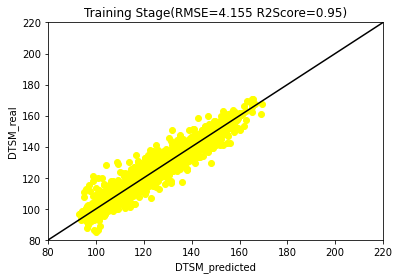

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_train, ypredtrain)
MSE = metrics.mean_squared_error(y_train, ypredtrain)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, ypredtrain))
r2score = r2_score(y_train, ypredtrain, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score :', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

u = np.arange(80,220,0.01)
i = u
plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.scatter (ypredtrain,y_train,color='yellow' )
plt.title("Training Stage(RMSE=" + t1 + " R2Score=" + t2 + ")")
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")

# plt.savefig("Train Stage ANN.png", dpi=500)
# files.download("Train Stage ANN.png")
plt.show()

### Test Prediction 

In [18]:
ypredtest = best_model.predict(X_test)

Mean Absolute Error: 2.8713090363047598
Mean Squared Error: 15.936919803855833
Root Mean Squared Error: 3.9921071884226547
r2 Score : 0.9568104398603071


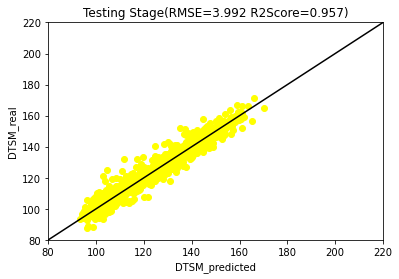

In [19]:
MAE = metrics.mean_absolute_error(y_test, ypredtest)
MSE = metrics.mean_squared_error(y_test, ypredtest)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, ypredtest))
r2score = r2_score(y_test, ypredtest, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score :', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.scatter (ypredtest, y_test, color='yellow' )
plt.title("Testing Stage(RMSE=" + t1 + " R2Score=" + t2 + ")")
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")

# plt.savefig("Test Stage ANN.png", dpi=500)
# files.download("Test Stage ANN.png")
plt.show()

### Use the model to predict all data 

In [20]:
X_test = data[['DTCO_adj','NPHI','GR','RESD','DEPT']]
X_test = scaler.transform(X_test)
predictions = best_model.predict(X_test)
data ['DTSM_PRED'] = predictions

In [21]:
data.to_csv("Hasil_ANN_AllData.csv",index=False)

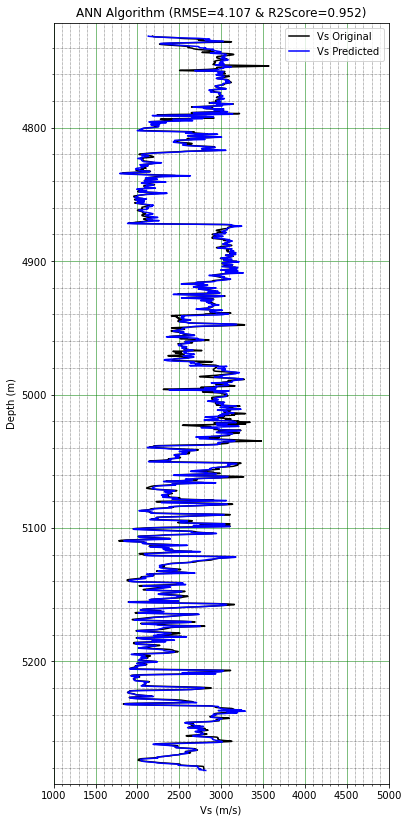

VS_max = 3288.6886128147266
Vs_min = 1788.8155081703408


In [22]:
MAE = metrics.mean_absolute_error(data['DTSM'], data['DTSM_PRED'])
MSE = metrics.mean_squared_error(data['DTSM'], data['DTSM_PRED'])
RMSE = np.sqrt(metrics.mean_squared_error(data['DTSM'], data['DTSM_PRED']))
r2score = r2_score(data['DTSM'], data['DTSM_PRED'], sample_weight=None, multioutput='uniform_average')
Corr=np.corrcoef(data['DTSM'], data['DTSM_PRED'])

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/data['DTSM']                    # ft/us
vs_pred = 1/data['DTSM_PRED']               # ft/us
vs_ori  = vs_ori* 10**6 *0.3048  # m/s
vs_pred = vs_pred* 10**6 *0.3048 # m/s

plt.figure(figsize=(6,14))
plt.plot(vs_ori, data['DEPT'], 'k', label='Vs Original')
plt.plot(vs_pred, data['DEPT'], 'b', label='Vs Predicted')
plt.title("ANN Algorithm (RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data["DEPT"]))-10, (np.max(data["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilANN_to_alldepth.png", dpi=500)
plt.show()
print("VS_max =",np.max(vs_pred))
print("Vs_min =",np.min(vs_pred))

In [23]:
print(data[['DTSM','DTSM_PRED']].shape)

(3614, 2)


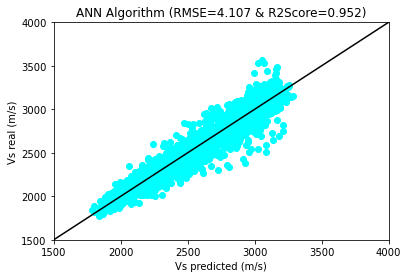

In [24]:
u = np.arange(1500, 4000,0.01)
i = u

plt.scatter (vs_pred, vs_ori, color='cyan')
plt.plot(u, i, color='black')
plt.xlim(1500, 4000)
plt.ylim(1500, 4000)
plt.xlabel("Vs predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("ANN Algorithm (RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict Final ANN.png", dpi=500)
plt.show()

# Predict Vs at Well Poseidon-2

In [25]:
filename2 = "E:\poseidon2.csv"
data2all = np.loadtxt(filename2, skiprows=1,delimiter=',')
mneumonics =  ['DEPT','GR','RESD','DTCO_adj','DTSM','RHOB','NPHI']
data2all = pd.DataFrame(data2all, columns=mneumonics)
data2all[data2all==-999.2500]= np.nan
data2=data2all.dropna()
# data2.head()
data2

,DEPT,GR,RESD,DTCO_adj,DTSM,RHOB,NPHI
8432,4706.0,87.1060,5.2738,63.5098,125.8618,2.7045,18.5850
8433,4706.5,114.0807,14.5054,53.4385,94.4603,2.6881,19.8786
8434,4707.0,132.6039,42.6378,56.3126,104.6554,2.5873,9.4619
8435,4707.5,76.1229,27.6133,60.5667,112.1985,2.5631,7.1419
8436,4708.0,81.0515,9.4066,70.8030,120.3025,2.5848,17.3160
...,...,...,...,...,...,...,...
9610,5295.0,101.7518,93.6949,54.7466,102.9919,2.5844,6.1230
9611,5295.5,106.8450,62.2725,57.1979,97.8452,2.6017,5.3946
9612,5296.0,87.8176,45.4477,58.4825,95.9389,2.6305,5.7106
9613,5296.5,121.3806,49.6154,62.2483,119.2572,2.6382,5.4973


In [26]:
X2 = data2[['DTCO_adj','NPHI','GR','RESD','DEPT']].values
y2 = data2[['DTSM']].values
print(X2.shape)
print(y2.shape)

(1183, 5)
(1183, 1)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2= scaler.fit_transform(X2)

In [28]:
ypredpos2 = best_model.predict(X2)

Mean Absolute Error: 10.75521106228757
Mean Squared Error: 190.90463809115172
Root Mean Squared Error: 13.81682445756447
r2 Score :  0.675700114507468


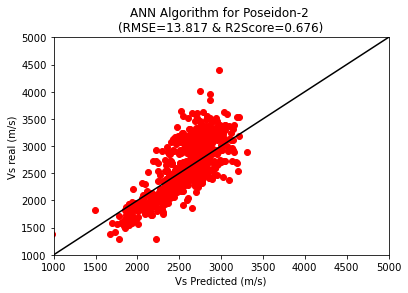

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

MAE = metrics.mean_absolute_error(y2, ypredpos2)
MSE = metrics.mean_squared_error(y2, ypredpos2)
RMSE = np.sqrt(metrics.mean_squared_error(y2, ypredpos2))
r2score = r2_score(y2, ypredpos2, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y2                      # ft/us
vs_pred = 1/ypredpos2              # ft/us
vs_ori_pos  = vs_ori* 10**6 *0.3048    # m/s
vs_pred_pos = vs_pred* 10**6 *0.3048   # m/s

plt.scatter (vs_pred_pos, vs_ori_pos, color='red')
s = np.arange(1000, 5000,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(1000, 5000)
plt.ylim(1000, 5000)
plt.xlabel("Vs Predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("ANN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict POS2 ANN.png", dpi=500)
plt.show()

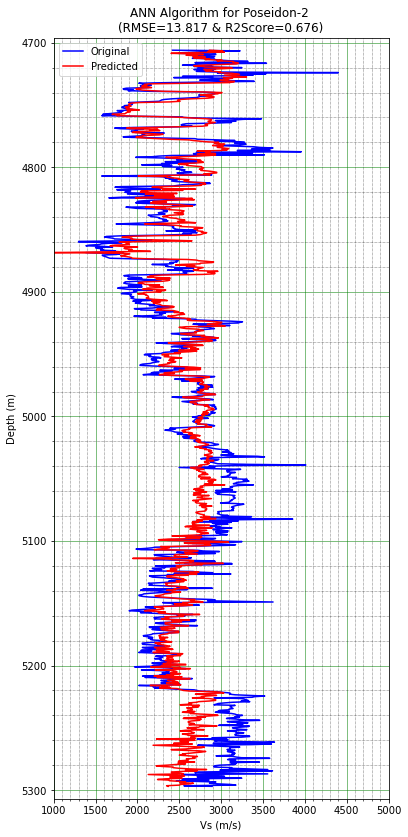

Vs_max = 3303.957892350198
Vs_min = 974.5340388455255


In [30]:
plt.figure(figsize=(6,14))
plt.plot(vs_ori_pos, data2['DEPT'],label='Original',color='blue')
plt.plot(vs_pred_pos, data2['DEPT'],label='Predicted',color='red')
plt.title("ANN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilANN_poseidon2.png", dpi=500)
plt.show()
print("Vs_max =",np.max(vs_pred_pos))
print("Vs_min =",np.min(vs_pred_pos))